# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook)<br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии)<br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1.1 **(p)** Посчитайте
 - [общее количество курсов в датасете](#1.1.1-Посчитаем-общее-количество-курсов-в-датасете)
 - [количество модулей на каждом курсе](#1.1.2-Количество-модулей-на-каждом-курсе)
 - [количество уроков в каждом модуле на каждом курсе](#1.1.3-Количество-уроков-в-каждом-модуле-на-каждом-курсе)
 - [медианное количество уроков в модуле на каждом курсе](#1.1.4-Медианное-количество-уроков-в-модуле-на-каждом-курсе)
 - [количество учеников на каждом курсе](#1.1.5-Количество-учеников-на-каждом-курсе)
 - [минимальный, максимальный, средний, медианный возраст студентов](#1.1.6-Минимальный,-максимальный,-средний,-медианный-возраст-студентов)
 - [минимальный, максимальный, средний, медианный возраст студентов на каждом курсе](#1.1.7-Минимальный,-максимальный,-средний,-медианный-возраст-студентов-на-каждом-курсе)

[1.2 **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы](#1.2-Постройте-bar-chart,-отражающий-количество-студентов-на-каждом-курсе.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы)

[1.3 **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐](#1.3-Постройте-горизонтальный-(столбцы-должны-располагаться-горизонтально)-bar-chart,-отражающий-количество-студентов-на-каждом-курсе.-График-должен-иметь-заголовок.-Значения-должны-быть-отсортированы.-Цвет-столбцов-должен-содержать-информацию-о-сфере,-к-которой-относится-курс-(то-есть-нужна-легенда).-Прозрачность-должна-стоять-на-отметке-0.1.-На-график-должна-быть-нанесена-линия-медианы.-У-медианы-должен-быть-свой-цвет.-Рамки-у-графика-быть-не-должно-⭐)

[1.4 На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)](#1.4-На-основании-рассчитанных-значений-опишите-данные-(описание-должно-быть-полным-и-покрывать-все-полученные-выше-метрики))

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

Для начала импортируем библиотеки для работы, а также загрузим все имеющиеся датафреймы из представленных файлов

In [993]:
import numpy as np
import pandas as pd
# import math
# import missingno as msno
# from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline
import seaborn as sns
# plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os
import sys

Загружаем все файлы в датафреймы для дальнейшей работы с ними

In [994]:
df_courses = pd.read_csv('./data/courses.csv', index_col=0)
df_course_contents = pd.read_csv('./data/course_contents.csv')
df_progresses = pd.read_csv('./data/progresses.csv')
df_progress_phases = pd.read_csv('./data/progress_phases.csv', parse_dates=['start_date', 'finish_date'], dayfirst=False)
df_students = pd.read_csv('./data/students.csv', parse_dates=['birthday'], dayfirst=False)

Теперь соединим 4 таблицы в один датафрейм

In [995]:
df_merged = df_progress_phases.merge(df_progresses, how='left', left_on='progress_id', right_on='id').drop(columns='id') # соединяем датафреймы progress_phases и progresses по progress_id и id и удаляем лишний столбец id
df_courses = df_courses.add_prefix('course_') # переименуем названия столбцов
df_merged = df_merged.merge(df_courses, how='left', on='course_id') # соединяем с таблицей courses
df_merged = df_merged.merge(df_course_contents, how='left', on=['module_number', 'lesson_number', 'course_id']) # соединяем с таблицей course_contents

Убедимся что все таблицы собраны верно сравнив полученный результат с образцом

In [4]:
df_merged[df_merged.student_id == '768c2987a744c51ce64a5993a2a94eaf']

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00:00,2018-06-20 15:45:07.717209+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00:00,2018-06-23 08:18:12.784616+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.361780+00:00,2018-06-21 19:09:30.845034+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00:00,2018-06-23 08:18:09.552181+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00:00,2018-06-20 16:00:06.127191+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,NaT,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00:00,2018-06-20 15:58:21.886722+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00:00,2018-06-21 19:10:36.707919+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


#### 1.1.1 Посчитаем общее количество курсов в датасете

In [996]:
df_merged.course_id.nunique()

15

#### 1.1.2 Количество модулей на каждом курсе

In [6]:
df_merged.groupby('course_title')['module_number'].nunique().to_frame()

,module_number
course_title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


#### 1.1.3 Количество уроков в каждом модуле на каждом курсе

Если попытаться посчитать количество уроков в каждом модуле по названию уроков, то получим неточный результат, т.к. в некоторых курсах имеются разные уроки, имеющие одно и то же название. Например, курс **Java-разработчик c нуля**, где в нескольких модулях имеется по несколько уроков с одинковым названием ***''Домашняя работа''***, в чём нетрудно убедиться:

In [997]:
# для начала сгруппируем массив по названию курсов, модулей и уроков и применим функцию вывода массивов всех уникальных значений номеров уроков
df_lessons_count = df_merged.groupby(['course_title', 'module_number', 'lesson_title'])\
                                     .agg({'lesson_number':'unique'})

In [1000]:
# теперь выполним срез по всем курсам по условию где количество номеров уроков с одним названием больше одного
df_lessons_count[df_lessons_count.lesson_number.apply(lambda row: len(row) > 1)]

lesson_number
course_title            module_number lesson_title                      
Java-разработчик c нуля 6             Домашняя работа      [2, 6, 4, 13]
                        7             Домашняя работа             [8, 2]
                        8             Домашняя работа         [4, 8, 11]
                        9             Домашняя работа  [7, 12, 5, 9, 14]

И действительно, если сравнить два метода подсчёта: по названию уроков и по номерам уроков, то можно убедиться что значения по курсу **Java-разработчик c нуля** получатся различные<br>
**`неправильный метод расчёта`**

In [749]:
df_merged.groupby(['course_title', 'module_title'])['lesson_title'].nunique().to_frame().loc['Java-разработчик c нуля']

,lesson_title
module_title,
Вводный модуль,7
"Исключения, отладка, тестирование и логгирование",9
Массивы и коллекции,13
Наследование и полиморфизм,10
Объекты и классы,10
Особенности ООП в Java,12
Работа с файлами и сетью,11
Синтаксис языка,6
"Числа, строки и даты",27


**`правильный метод расчёта`**

In [748]:
df_merged.groupby(['course_title', 'module_title'])['lesson_number'].nunique().to_frame().loc['Java-разработчик c нуля']

,lesson_number
module_title,
Вводный модуль,7
"Исключения, отладка, тестирование и логгирование",11
Массивы и коллекции,13
Наследование и полиморфизм,13
Объекты и классы,10
Особенности ООП в Java,13
Работа с файлами и сетью,15
Синтаксис языка,6
"Числа, строки и даты",27


Итак, итоговый датафрейм

In [752]:
df_merged.groupby(['course_title', 'module_title'])['lesson_number'].nunique().to_frame()

lesson_number
course_title                  module_title                                                     
Excel Базовый                  Визуализация данных Excel                                      5
                              Основной функционал Excel                                      11
                              Основной функционал Excel (продолжение)                         7
                              Сводные таблицы Excel                                           5
                              Формулы и функции Excel. Более сложные формулы                  5
...                                                                                         ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                               5
                              Требовательность digital-продюсера                              4
                              Управление временем                                             4
                              Управление дизайнерами. Разработка дизайна по s...              7
                              Экологичный путь менеджера                                      4

[229 rows x 1 columns]

#### 1.1.4 Медианное количество уроков в модуле на каждом курсе

In [944]:
df_merged.groupby(['course_title', 'module_title']).lesson_number.nunique().groupby('course_title').median().to_frame()

,lesson_number
course_title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


#### 1.1.5 Количество учеников на каждом курсе

In [9]:
df_merged.groupby('course_title').student_id.nunique().to_frame()

,student_id
course_title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


#### 1.1.6 Минимальный, максимальный, средний, медианный возраст студентов

In [1001]:
# приведём колонку birthday к формату дат
df_students.birthday = pd.to_datetime(df_students.birthday, yearfirst=True, dayfirst=False, format='%Y-%m-%d', errors='coerce') # преобразовываем в формат Timestamp
df_students.dropna(subset=['birthday'], inplace=True) # убираем непреобразованные значения NaT и неопределённые значения NaN
df_students.reset_index(drop=True, inplace=True) # сброс индексов и перезапись в текущий датафрейм

In [1002]:
# рассчёт возраста студентов на основе дат рождения
now = pd.Timestamp.today() # текущая дата
age = lambda x: relativedelta(now, x).years # функция для расчёта возраста студентов по дате рождения
df_students['age'] = df_students.birthday.apply(age) # расчёт возраста и добавление в новый столбец age

In [1003]:
# рассчитаем минимальный, максимальный, средний и медианный возрас студентов применив функции
df_students.age.apply(['min', 'max', 'mean', 'median']).to_frame() # расчёт мин., макс., средних и медианных значений для возрастов

,age
min,-179.000000
max,135.000000
mean,29.241624
median,29.000000


Здесь видно, что минимальные и максимальные значения указаны некорректно, т.к. некоторые даты выходят за пределы диапазона реальных дат, т.е. мы имеем дело с выбросами.<br>
Скорректируем данные, удалив всех студентов, чей возраст выходит за диапазон от 10 до 90 лет

In [1004]:
df_students.drop(np.where(df_students.age.lt(10) | df_students.age.gt(90))[0], inplace=True) # сортировка значений возрастов по условию от 10 до 90
df_students.age.apply(['min', 'max', 'mean', 'median']).to_frame() # перерасчёт мин., макс., средних и медианных значений для возрастов

,age
min,10.000000
max,90.000000
mean,29.284736
median,29.000000


Так уже намного лучше выглядит

#### 1.1.7 Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

Чтобы посчитать эти параметры, необходимо сначала соединить датафрейм **df_students** с уже объединёным массивом ранее **df_merged** по столбцу `students_id`

In [1005]:
df_students.rename(columns={'id':'student_id'}, inplace=True) # сначала переименуем колонку id в students_id
df_students.drop(columns='id_', inplace=True) # и удалим ненужную колонку _id
df_merged_all = df_merged.merge(df_students, how='left', on='student_id') # соединяем датафреймы в один общий

In [1006]:
# сгруппировав по курсам новый датафрейм, получим искомые значения минимальных, максимальны, средних и медианных возрастов по каждому курсу
df_merged_all[['course_title', 'age']].groupby('course_title').agg(['min', 'max', 'mean', 'median'])

age                        
                                      min   max       mean median
course_title                                                     
Excel Базовый                        16.0  61.0  33.233423   33.0
Java-разработчик                     14.0  64.0  29.764395   29.0
Java-разработчик c нуля              14.0  55.0  30.004407   29.0
JavaScript с нуля                    14.0  59.0  28.639839   28.0
PHP-разработчик с 0 до PRO. Часть 1  14.0  75.0  31.125342   30.0
SMM-маркетолог от А до Я             17.0  52.0  28.931428   28.0
UX-дизайн                            15.0  85.0  30.447956   30.0
Анимация интерфейсов                 15.0  51.0  29.861722   29.0
Веб-вёрстка для начинающих 2.0       13.0  59.0  28.746811   28.0
Веб-дизайн PRO 2.0                   15.0  59.0  28.527865   27.0
Веб-дизайн Базовый                   16.0  51.0  28.637495   28.0
Веб-дизайн с нуля 2.0                13.0  75.0  28.168616   27.0
Веб-разработчик                      14.0  51.0  27.563628   27.0
Интернет-маркетолог от Ingate        16.0  90.0  31.477915   30.0
Руководитель digital-проектов        18.0  55.0  31.930218   31.0

### 1.2 Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

In [1007]:
# Создадим датафрейм сгруппированый по названиям курсов и отсортированныйп по убыванию
sum_students_courses = df_merged_all.groupby('course_title').student_id.nunique().sort_values(ascending=False)

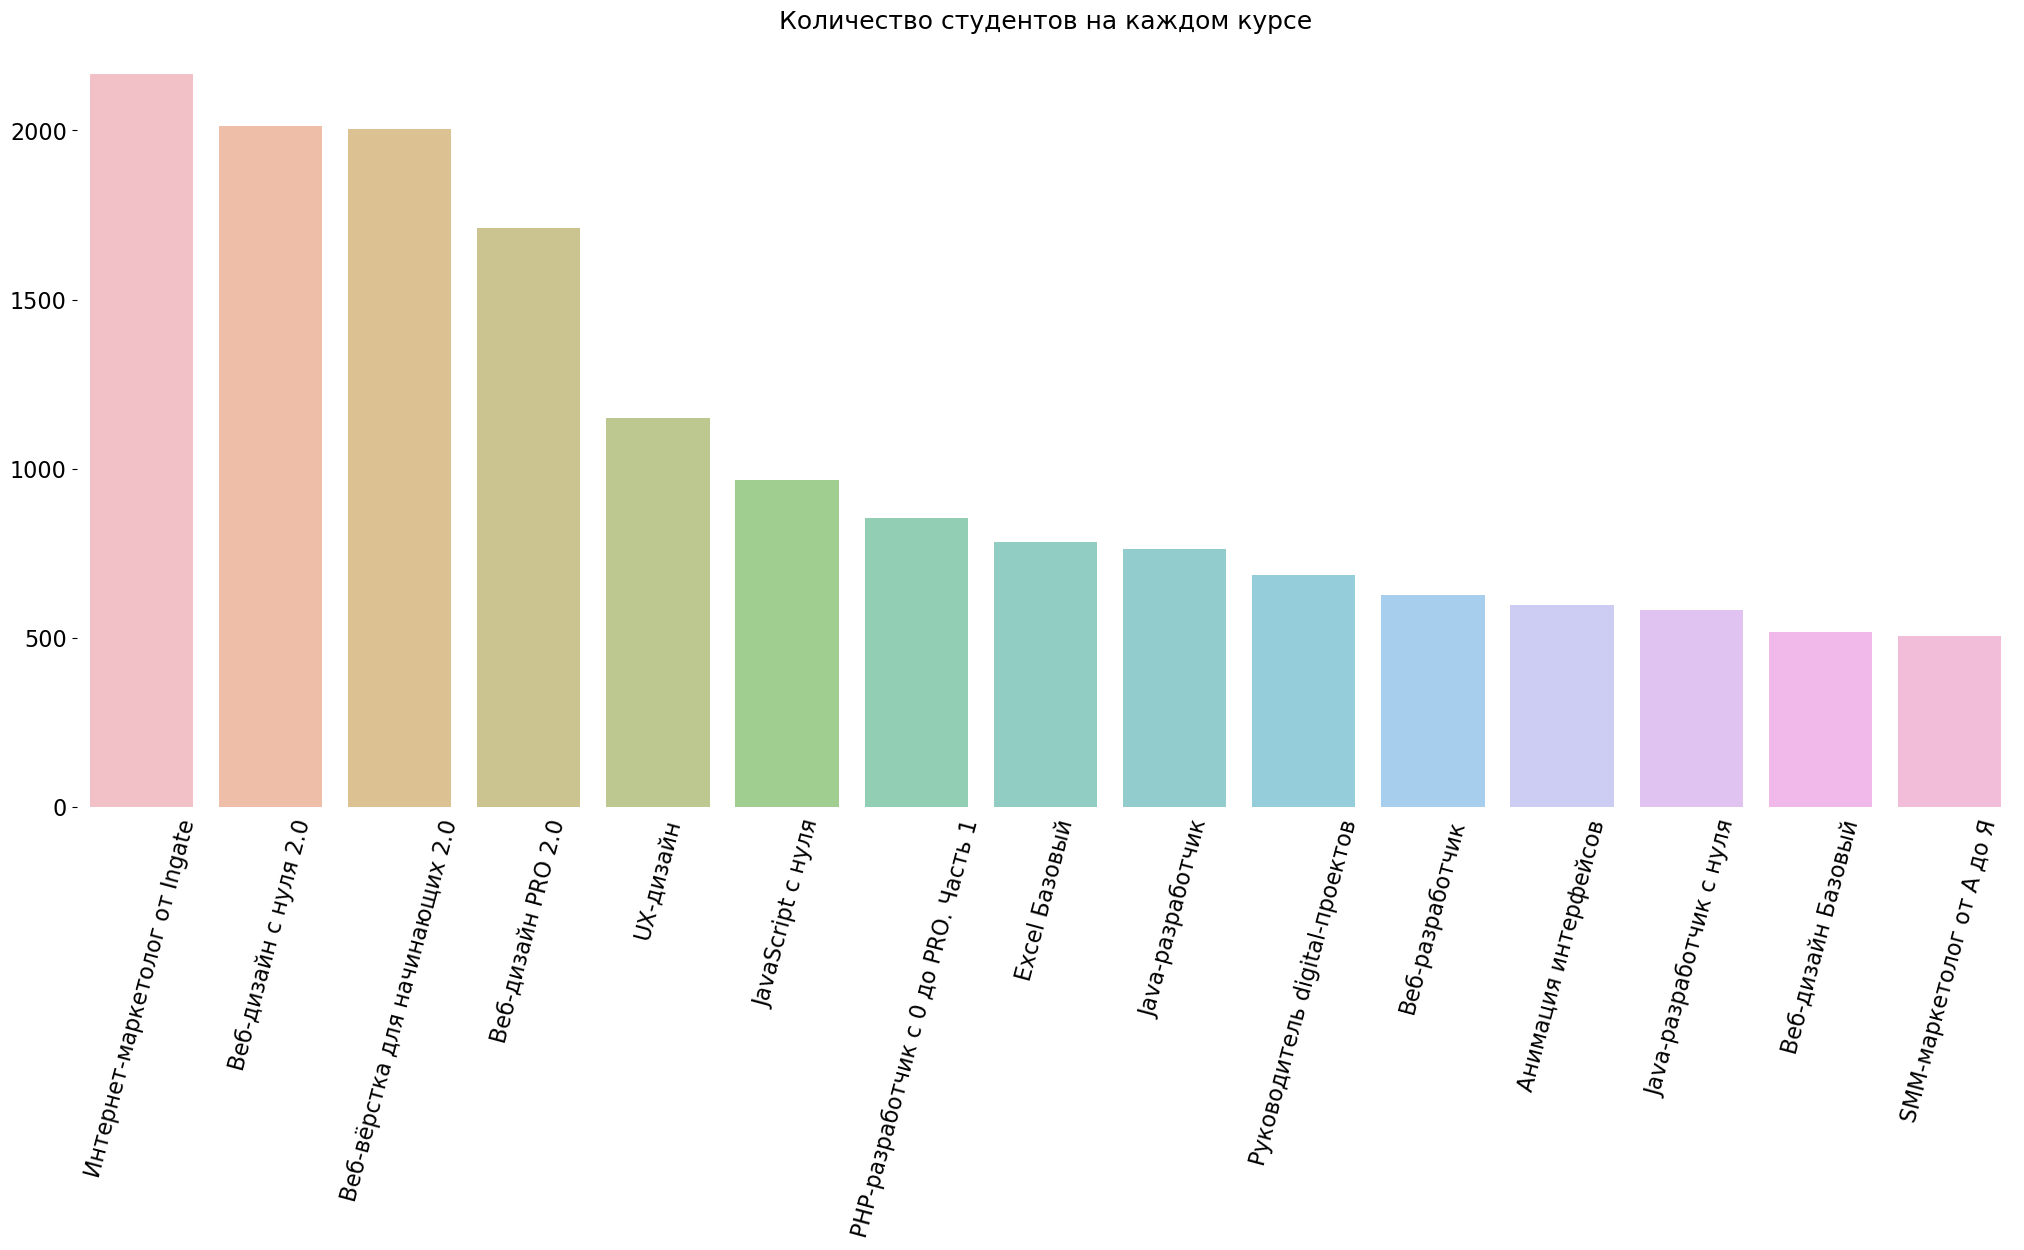

In [420]:
plt.figure(figsize=(25,10))
ax = plt.axes()
plt.title("Количество студентов на каждом курсе", fontsize=18)
plt.xticks(np.arange(0, max(sum_students_courses+1), 100), rotation=75)
plt.tick_params(labelsize=16)
for spine in ax.spines.values(): # убираем рамки
    spine.set_visible(False)
ax.xaxis.set_ticks_position('none') # убираем тикеты с оси x
sns.barplot(x=sum_students_courses.index, y=sum_students_courses.values, alpha=0.6)\
    .set(ylabel=None, xlabel=None)

plt.show()

### 1.3 Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

In [1008]:
field_dict = dict(zip(df_merged_all.course_field.unique(), ['g', 'r', 'b', 'y'])) # создадим словарь цветов для каждой сферы курсов

In [1009]:
# создаём новый дафтафрейм сгруппированный по названиями и сферам курсов
df_colored = df_merged_all.groupby(['course_title', 'course_field']).student_id\
    .nunique()\
    .sort_values(ascending=False)\
    .to_frame()\
    .reset_index(level=1)
color = lambda x: field_dict[x] # функция для добавления цвета по каждой сфере курсов
df_colored['color'] = df_colored.course_field.apply(color) # добавляем новую колонку color в массив
df_colored

,course_field,student_id,color
course_title,,,
Интернет-маркетолог от Ingate,Marketing,2168,r
Веб-дизайн с нуля 2.0,Design,2014,g
Веб-вёрстка для начинающих 2.0,Development,2004,b
Веб-дизайн PRO 2.0,Design,1711,g
UX-дизайн,Design,1151,g
JavaScript с нуля,Development,966,b
PHP-разработчик с 0 до PRO. Часть 1,Development,854,b
Excel Базовый,Business,782,y
Java-разработчик,Development,763,b


Теперь, когда получен необхоимый нам датафрейм, отрисуем его в har-chart.<br>
Но для начала, рассчитаем медианное количество студентов всего по всем курсам

In [1010]:
median_num_students = df_colored.student_id.median()
median_num_students

782.0

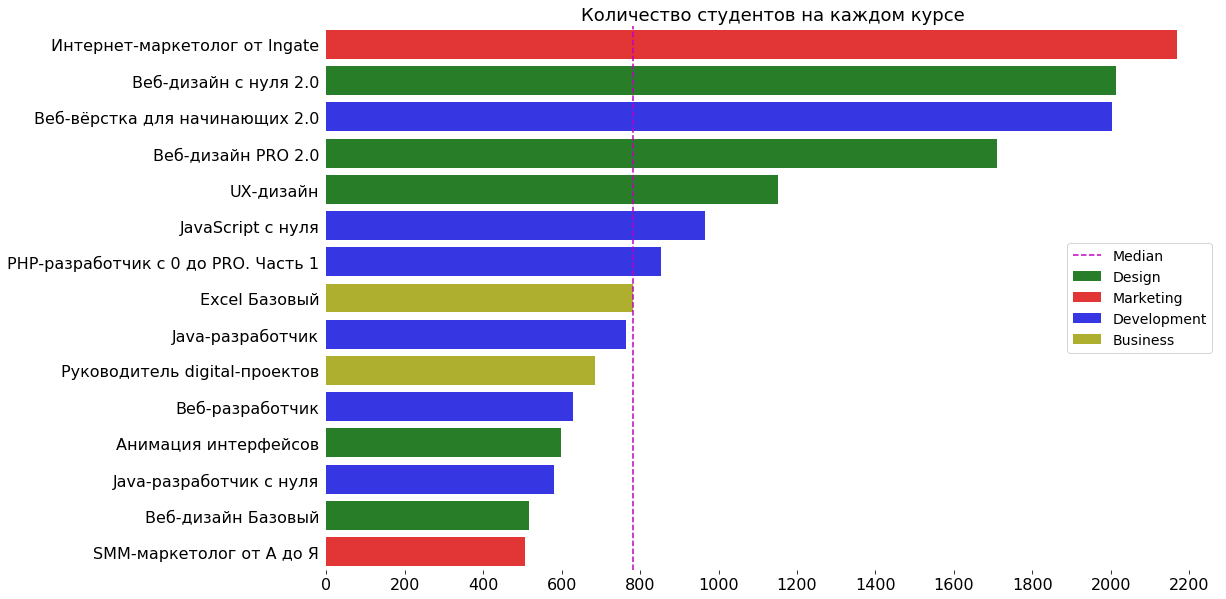

In [1226]:
plt.figure(figsize=(16,10))
ax = plt.axes()
plt.title("Количество студентов на каждом курсе", fontsize=18)
plt.xticks(np.arange(0, max(sum_students_courses+200), 200))
plt.tick_params(labelsize=16)

sns.barplot(y=df_colored.index, x='student_id',
            hue='course_field',
            hue_order=field_dict.keys(),
            dodge=False,
            data = df_colored, alpha=0.9,
            palette=field_dict.values())\
            .set(ylabel=None, xlabel=None)
plt.axvline(x=median_num_students, ls='--', label='Median', color='m') # добавляем медианное значение вертикальной линией
for spine in ax.spines.values(): # убираем рамки
    spine.set_visible(False)
ax.yaxis.set_ticks_position('none') # убираем тикеты с оси y
plt.legend(fontsize=14)
plt.show()

### 1.4 На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

**<u>Предварительные данные</u>**

**Общее количество курсов**: 15 курсов<br>
**Количество модулей на каждом курсе**: от 8 модулей (курс "*PHP-разработчик с 0 до PRO. Часть 1*" и "*Веб-вёрстка для начинающих 2.0*") до 21 модуля (курс "*Анимация интерфейсов*")<br>
**Медианное количество уроков по каждому курсу:** от 2.0 на курсе "*Веб-разработчик*", до 10 на курсе "*Java-разработчик с нуля*"<br>
**Количество учеников на каждом курсе:** от 506 учеников на курсе "*SMM-маркетолог от А до Я*" и 518 ("*Веб-дизайн базовый*") до 1711 учеников на курсе "*Веб-дизайн PRO 2.0*"
**Минимальный, максимальный, средний, медианный возраст студентов:** минимальный возраст - от 13 лет (курс "*Веб-дизайн с нуля 2.0*"), а максимальный - до 85 лет ("*UX-дизайн*") и даже 90 лет на курсе "*Интернет-маркетолог от Ingate*"(однако, скорее всего это выброс), средний возраст студентов - от 27 лет (курс "*Веб-разработчик*"), до 33.2 лет ("*Exel Базовый*"), медианный возраст - от 27 лет (курсы "*Веб-дизайн с нуля 2.0*", "*Веб-разработчик*", "*Веб-дизайн PRO 2.0*"), до 33 лет (курс "*Excel Базовый*")<br>
**Количество студентов на каждом курсе (на графике)**: максимум - 2168 студентов на курсе "*Интернет-маркетолог от Ingate*", минимум - 506 студентов  на курсе "*SMM-маркетолог от А до Я*"
**Медианное количество студентов по всем курсам** составляет ***782 студента***.

Итак, можно сделать **предварительные выводы** о том, что больше всего курсов на платформе посвящены направлениям ***`Разработка`*** и ***`Дизайн`*** как самым популярным направлениям. Причём стоит отметить, что на направлении ***`Дизайн`*** популярны именно продвинутые курсы, дающие профессию, курсы же, рассчитанные для новичков, - не так популярны.<br>
Всего обучается около 16 тыс. студентов по всем направлениям. Самым неравномерным является направление ***`Маркетинга`*** (курс, где больше всего студентов и курс, где меньше всего студентов). На курсах по направлению ***`Бизнес`*** обучаются самые взрослые студенты. А вот курсы по ***`Дизайну`*** опять-таки очень неравномерны в разрезе возрастных категорий студентов: тут учатся как самые юные студенты, так и самые великовозрастные. На ***`Девелопментте`*** учатся студенты средних лет, которым около 30 лет.

## 2. Расчет потенциальной нагрузки на преподавателей

[2.1 **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы](#2.1-Рассчитать-прирост-студентов-на-каждом-курсе-в-каждом-месяце-за-всю-историю-(каждый-месяц-в-диапазоне-от-марта-2016-до-июля-2019-включительно).-Считать-дату-начала-прохождения-курса-студентом-по-дате-начала-первой-домашней-работы)<br>
[2.2 **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы](#2.2-На-основании-первого-пункта-построить-line-graph-с-приростом-студентов-в-каждом-месяце-для-каждого-курса.-15-графиков.-Графики-должны-иметь-заголовки,-оси-должны-быть-подписаны.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы)<br>
[2.3 **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐](#2.3-На-основании-первого-пункта-построить-line-graph-с-несколькими-линиями,-отражающими-прирост-студентов-в-каждом-месяце-для-каждого-курса.-15-линий-на-графике.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы.-График-должен-иметь-заголовок.-Ось,-отражающая-прирост,-должна-быть-подписана.-Линия-для-каждого-курса-должна-иметь-свой-цвет-(нужна-легенда).-Рамок-у-графика-быть-не-должно-⭐)<br>
[2.4 **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)](#2.4-Рассчитать-количество-прогрессов-по-выполнению-домашних-работ-в-каждом-месяце-за-всю-историю-(каждый-месяц-в-диапазоне-от-марта-2016-до-июля-2019-включительно)-для-каждого-курса.-Учитывать,-что-выполнение-домашнего-задания-может-перетекать-из-одного-месяца-в-другой-(такие-дз-надо-включать-в-общее-число-прогрессов-для-всех-месяцев,-которые-покрывает-срок-выполнения-этих-дз))<br>
[2.5 **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы](#2.5-Построить-line-graph-по-четвертому-пункту.-15-графиков.-Графики-должны-иметь-заголовки,-оси-должны-быть-подписаны.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы)<br>
[2.6 **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐](#2.6-Построить-один-line-graph-для-всех-курсов-по-четвертому-пункту.-15-линий-на-графике.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы.-График-должен-иметь-заголовок.-Ось,-отражающая-количество-прогрессов,-должна-быть-подписана.-Линия-для-каждого-курса-должна-иметь-свой-цвет-(нужна-легенда).-Рамок-у-графика-быть-не-должно-⭐)<br>
[2.7 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)](#2.7-На-основании-рассчитанных-значений-сделайте-аналитический-вывод-(должен-быть-полным-и-покрывать-все-полученные-выше-метрики))

### 2.1 Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы

In [1011]:
df_students_month = df_merged[df_merged.is_homework] # получаем датафрейм с необходимыми столбцами срезанный по идентификатору статуса "домашнее задание"
df_students_month = df_students_month.assign(year_month=lambda x: x.start_date.dt.to_period('M')) # добавляем новый столбец дат в формате Y-m для группировки
df_students_month

C:\Users\greym\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1091: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,year_month
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,NaT,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,2018-06
12,a97393fe164b448e7231c07d48c82f9e,2,6,start,2018-03-11 14:14:44.814222+00:00,NaT,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Домашняя работа,bae729ef-e399-4ed8-a62b-c8195ed754aa,False,True,2018-03
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,2018-02
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-02 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Основы работы с графикой,Домашняя работа,e362bb6e-4ab4-4533-985e-d728300e4c32,False,True,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350640,64214d35e6450476bbf2e4a66f3dcf11,1,9,done,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2019-05
350642,64214d35e6450476bbf2e4a66f3dcf11,4,5,done,2019-06-18 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Работа со стилями. Создание GUI,Домашняя работа,7b35fbae-e93e-42d4-a24e-4ec54045eb19,False,True,2019-06
350659,64214d35e6450476bbf2e4a66f3dcf11,3,4,done,2019-06-04 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,"Тренды, подготовка, мудборды",Домашняя работа,6122e61d-b908-4fca-a852-78b55dffc432,False,True,2019-06
350665,ea9c93865c1de54a5079b7ae71c88683,1,7,done,2019-06-29 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,2019-06


In [1012]:
# массив названий всех курсов
courses = df_students_month.course_title.unique()
courses.sort() # отсортируем полученный массив
courses

array(['Excel Базовый', 'Java-разработчик', 'Java-разработчик c нуля',
       'JavaScript с нуля', 'PHP-разработчик с 0 до PRO. Часть 1',
       'SMM-маркетолог от А до Я', 'UX-дизайн', 'Анимация интерфейсов',
       'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн PRO 2.0',
       'Веб-дизайн Базовый', 'Веб-дизайн с нуля 2.0', 'Веб-разработчик',
       'Интернет-маркетолог от Ingate', 'Руководитель digital-проектов'],
      dtype=object)

In [1013]:
# создаём датафрейм, по которому будем срезать основной массив
# здесь рассчитывается номер первого модуля, в котором есть д|з для каждого курса
df_slicer = pd.DataFrame()
for course in courses:
    df_slicer = df_slicer.append(pd.DataFrame(
        (
            (course, df_students_month[df_students_month.course_title.eq(course)].module_number.min()),
        ),
            columns=['course_title', 'module_number']
                                             )
                                )

In [1014]:
df_slicer

,course_title,module_number
0,Excel Базовый,1
0,Java-разработчик,1
0,Java-разработчик c нуля,1
0,JavaScript с нуля,1
0,PHP-разработчик с 0 до PRO. Часть 1,1
0,SMM-маркетолог от А до Я,1
0,UX-дизайн,1
0,Анимация интерфейсов,1
0,Веб-вёрстка для начинающих 2.0,1
0,Веб-дизайн PRO 2.0,1


In [1015]:
# соединяем два датафрейма с фильтрацией строк по второму (срез лишних строк)
df_students_month_merged = pd.merge(df_students_month, df_slicer,
                                    how='right',
                                    on=['course_title', 'module_number'],)
df_students_month_merged

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,year_month
0,254e96b86d572b4685b06afd26941c3f,1,11,done,2018-12-10 16:15:15.891656+00:00,2018-12-12 10:17:59.828500+00:00,2364226ef29a6afef154dc8f5cef203d,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-12
1,f11f4aa8914aec9f51feafa2b7b39a1b,1,11,done,2019-05-01 18:59:13.272997+00:00,2019-05-07 04:13:29.298187+00:00,c8620d7c8669b9ce5514b7e22b421f66,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2019-05
2,eb09e4fda04ad88bc2ff8c85a17a323f,1,11,done,2018-11-29 17:32:22.257822+00:00,2018-12-02 16:34:48.864140+00:00,de4d367fb54ae3b088bcd5d757fdd95f,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-11
3,9d3393fe7b21731f9904488a20d0609e,1,11,done,2019-04-03 12:05:44.802008+00:00,2019-04-05 08:31:32.867733+00:00,27a4affbd4faad18f7d108f8ff719dbb,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2019-04
4,e9eec59e37bb88e9a3c65510e75d679e,1,11,done,2018-08-23 16:41:23.848277+00:00,2018-09-06 10:38:52.336251+00:00,35a96a3a2e6a0e4eef24fbd6786580c7,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,dcd72f12fea3f18492c8dc6755d72a1e,1,4,done,2018-04-25 10:04:21.924075+00:00,2018-04-26 07:37:25.209867+00:00,94d66c74d458208d29235029fb0ed549,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2018-04
10803,385e72033e7ddfdb246f80aeccdf256f,1,4,done,2018-09-03 19:03:25.975177+00:00,2018-09-04 03:32:33.608175+00:00,29f09a9aabe1acf8affce163e7d57934,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2018-09
10804,d6aecef2950da3d3caab8986a137f425,1,4,done,2019-06-24 20:12:37.536867+00:00,2019-06-27 10:23:37.583397+00:00,ed1264d17483d836e4924ad30abab674,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2019-06
10805,39a5e743f944d87d4e2247709d297d64,1,4,done,2019-01-11 00:23:53.553998+00:00,2019-03-06 09:35:24.656357+00:00,b19327e2fd348d705ddc2d202d1b7f6d,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2019-01


In [1016]:
table1 = df_students_month[(df_students_month.module_number == 1) | (df_students_month.course_title == 'Веб-дизайн Базовый') & (df_students_month.module_number == 3)]
table1

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,year_month
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,2018-02
82,000962791295398b5ec7bc24f05269ac,1,9,done,2018-08-28 06:07:40.775809+00:00,2018-09-13 10:25:35.378681+00:00,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2018-08
111,2041e707f186990fef40d6e5d869ddf6,1,8,done,2019-02-26 15:18:47.304803+00:00,2019-03-03 13:48:32.212435+00:00,84d2010cc192eb3b4d73477cca78845b,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,474607cc-0b1b-405d-b391-21bb3fca7bd2,False,True,2019-02
144,81fb8b7412a483355d02d32987aaba6e,1,3,start,2018-07-07 10:13:37.089749+00:00,NaT,3dac07629e8e0b23af6654f6deda91c4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350531,ed2a00a809a650f23c7906d402f5fce5,1,6,done,2019-06-06 14:19:15.772642+00:00,2019-06-18 09:56:13.319438+00:00,f3eb61087cdea2962f57dd7c45893aaf,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,Вводный модуль,Домашняя работа,1eb308c8-9e05-4760-b8a9-64405055eb02,False,True,2019-06
350554,2f9742d87b5c9cd7dc1a37c406084aaa,1,9,done,2019-05-29 14:50:46.076432+00:00,2019-06-07 12:16:05.875544+00:00,9a6f04c06ddb0e3cb108d4e86890ff11,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2019-05
350582,a815345d620aefc617d9deb6d9c4f804,1,9,done,2019-05-23 18:12:41.852749+00:00,2019-05-25 10:16:36.611541+00:00,43feb3025ef3ec27e7ef61a95284cf8b,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2019-05
350640,64214d35e6450476bbf2e4a66f3dcf11,1,9,done,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2019-05


In [1017]:
# группируем по курсам, направлениям и датам, когда студенты приступили к 1 д/з, и считаем прирост по уникальным id студентов
df_students_month_adjunction = df_students_month_merged\
                                    .groupby(['course_title', 'course_field', 'year_month'])\
                                    .student_id\
                                    .nunique()\
                                    .to_frame()\
                                    .unstack(fill_value=0)\
                                    .stack(level=1)
df_students_month_adjunction

student_id
course_title                  course_field year_month            
Excel Базовый                 Business     2016-03              0
                                           2016-11              0
                                           2017-03              0
                                           2017-04              0
                                           2017-05              0
...                                                           ...
Руководитель digital-проектов Business     2019-03             36
                                           2019-04             17
                                           2019-05             25
                                           2019-06             15
                                           2019-07             20

[390 rows x 1 columns]

Как видно из датафрейма, не во всех месяцах наблюдается прирост студентов. Но нам нужно привести к единому виду датафрейм, чтобы были все месяцы в диапазоне от марта 2016 до июля 2019 включительно.
Для этого, создадим отдельный массив, заполненый всеми датами в указанном диапазоне с частотой в один месяц. И приведём даты к нужному нам формату строк YYYY-mm

In [1018]:
# массив дат за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно)
monthly_scale = pd.period_range(df_students_month.start_date.min(), # создаём массив генератором дат (формат в строки) от самого раннего месяца
                                df_students_month.start_date.max(), freq='M') # до последнего, c шагом в 1 месяц
monthly_scale_list = [date.strftime('%Y-%m') for date in monthly_scale] # создаём список дат в строковом формате

In [1019]:
# преобразуем таблицу к такому виду, чтобы можно было перезаписать индексы из полученного списка дат
df_students_month_adjunction = df_students_month_adjunction\
    .pivot_table(index='year_month', columns=['course_title', 'course_field'], values='student_id')\
    .reindex(monthly_scale, fill_value=0)\
    .unstack()\
    .to_frame()
df_students_month_adjunction.columns = ['adjunction'] # и добавим новое название колонке значений прироста студентов по каждому курсу
df_students_month_adjunction

adjunction
course_title                  course_field                    
Excel Базовый                 Business     2016-03           0
                                           2016-04           0
                                           2016-05           0
                                           2016-06           0
                                           2016-07           0
...                                                        ...
Руководитель digital-проектов Business     2019-03          36
                                           2019-04          17
                                           2019-05          25
                                           2019-06          15
                                           2019-07          20

[615 rows x 1 columns]

### 2.2 На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

Цвет графиков содержит информацию о сфере, к которой относится курс в соответствии с [п.1.3](#1.3-Постройте-горизонтальный-(столбцы-должны-располагаться-горизонтально)-bar-chart,-отражающий-количество-студентов-на-каждом-курсе.-График-должен-иметь-заголовок.-Значения-должны-быть-отсортированы.-Цвет-столбцов-должен-содержать-информацию-о-сфере,-к-которой-относится-курс-(то-есть-нужна-легенда).-Прозрачность-должна-стоять-на-отметке-0.1.-На-график-должна-быть-нанесена-линия-медианы.-У-медианы-должен-быть-свой-цвет.-Рамки-у-графика-быть-не-должно-⭐)

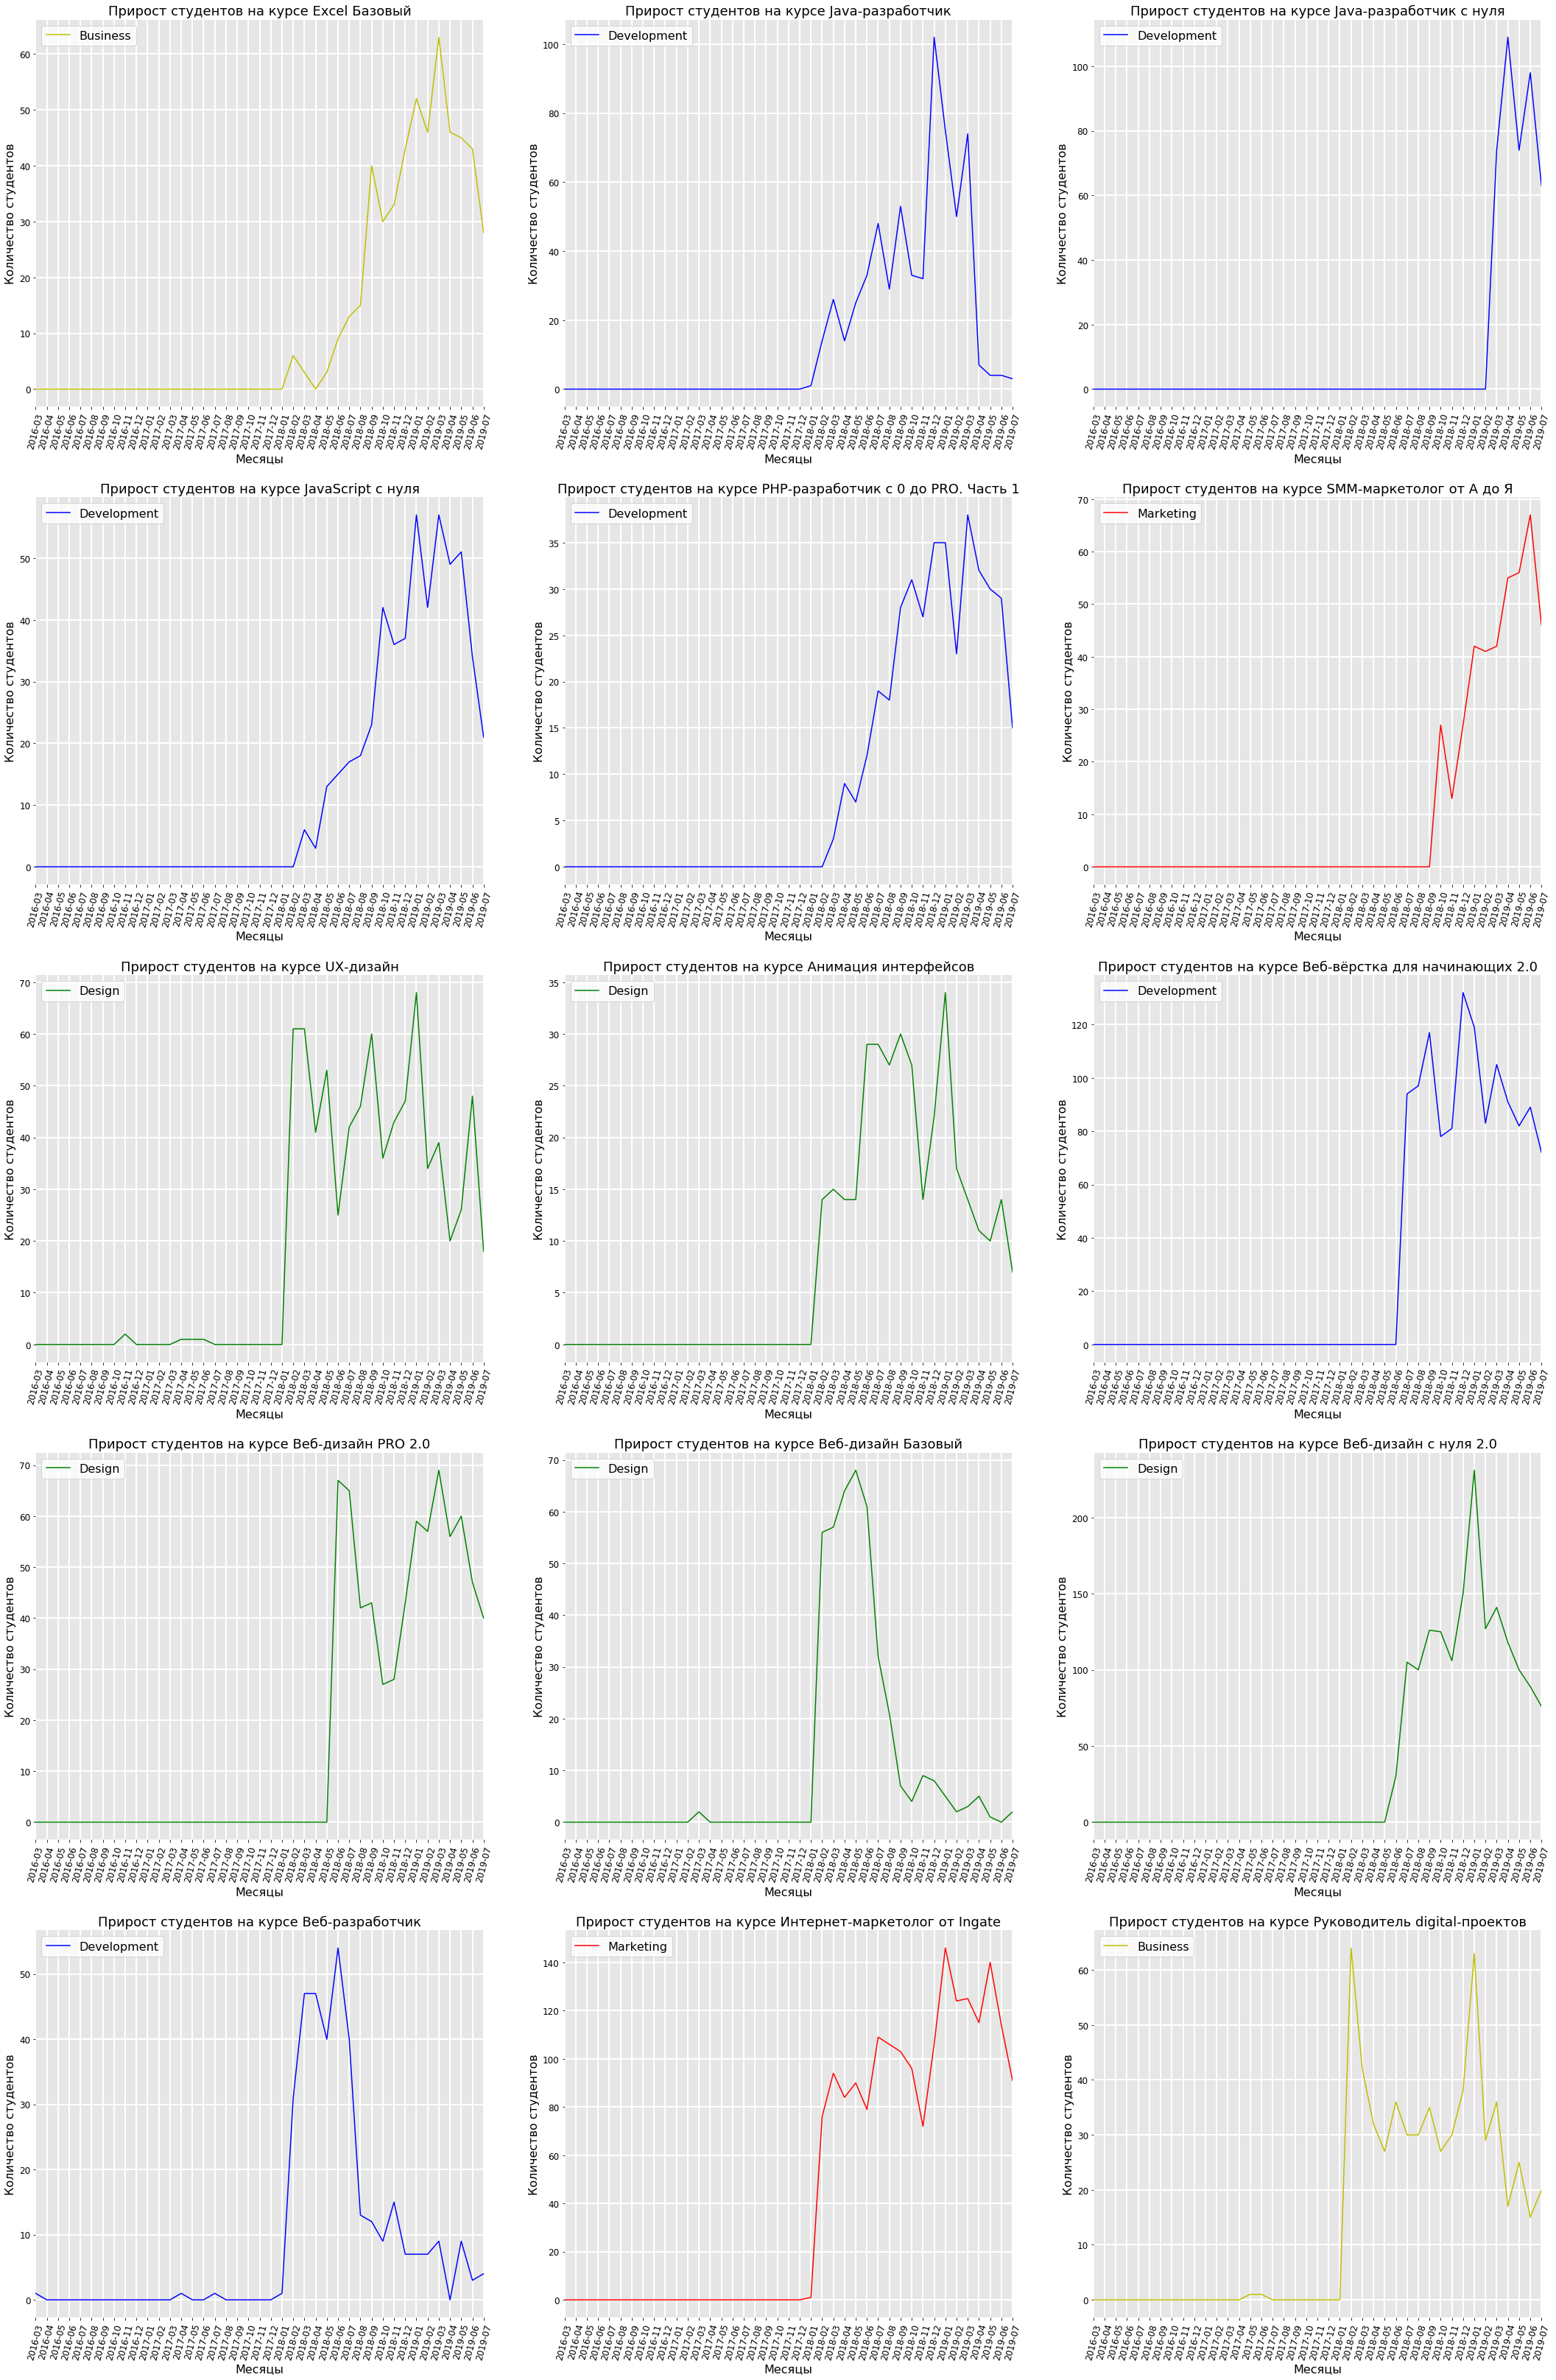

In [461]:
f,ax = plt.subplots(5, 3, figsize=(30,45))
course = iter(courses) # задаём итератор для перебора курсов
for row in range(5):
    for column in range(3):
        name = next(course) # запуск итератора
        plot = df_students_month_adjunction.loc[name].\
            plot(title=f'Прирост студентов на курсе {name}',
                 ax=ax[row,column],
                 layout=(row,column),
                 fontsize=16,
                 color=field_dict[df_students_month_adjunction.loc[name].index[0][0]]) # отрисовка графиков с параметрами
        ax[row,column].set_facecolor('.9') # фон полотен        
        for spine in ax[row,column].spines.values():
            spine.set_visible(False) # убираем рамки
        plot.title.set_size(18)
        plot.set_xlabel('Месяцы', size=16)
        plot.set_ylabel('Количество студентов', size=16)
        plot.set_xticks(range(len(monthly_scale)))
        plot.set_xticklabels(monthly_scale, rotation=75)
        plot.set_xlim(0, len(monthly_scale)-1) # лимиты по оси x
        plot.tick_params(labelsize=12)
        plot.grid(color='white', linewidth=2)
        plot.legend([df_progress_all.loc[name].index[0][0]], loc=2, fontsize=16)
plt.tight_layout(h_pad=2.5, w_pad=0.1)
plt.show()

### 2.3 На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

Чтобы графики не сильно сливались друг с другом зададим кастомный набор цветов и присвоим каждому курсу свой цвет

In [274]:
colors = {'xkcd:neon red': '#ff073a',
          'xkcd:neon green': '#0cff0c',
          'xkcd:ultramarine blue': '#1805db',
          'xkcd:vivid purple': '#9900fa',
          'xkcd:cyan': '#00ffff',
          'xkcd:greyish': '#a8a495',
          'xkcd:canary yellow': '#fffe40',
          'xkcd:bubblegum pink': '#fe83cc',
          'xkcd:deep violet': '#490648',
          'xkcd:dark blue': '#00035b',
          'xkcd:orange': '#f97306',
          'xkcd:blood red': '#980002',
          'xkcd:blue blue': '#2242c7',
          'xkcd:turtle green': '#75b84f',
          'xkcd:deep rose': '#c74767'
         }

color_map = {}
for i, course in enumerate(courses):
    color_map[course] = list(colors.values())[i]

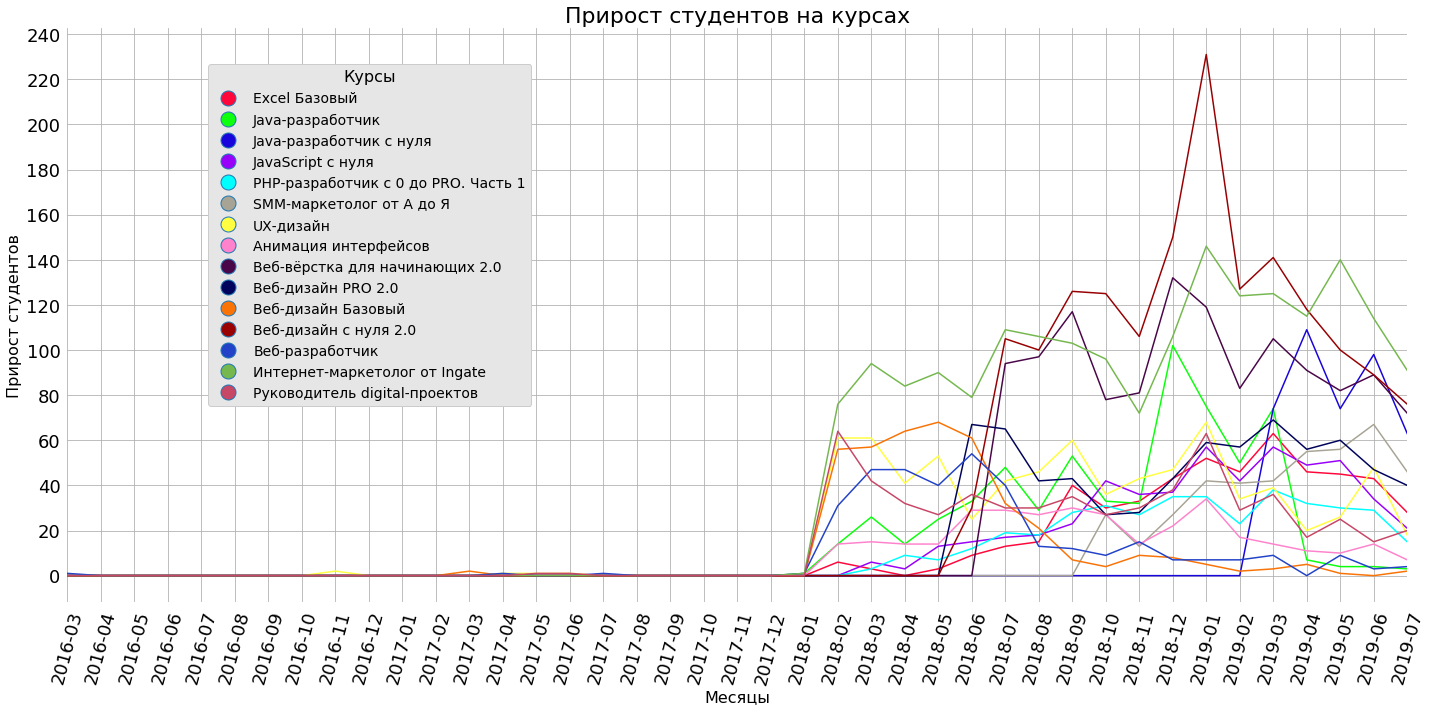

In [468]:
plt.figure(figsize=(20,10))
ax = plt.axes()

def fmarkers(course): # задаём функцию для отрисовки кастомных маркеров
    marker = mpl.lines.Line2D([0], [0],
                             linestyle='none',
                             mfc=color_map[course],
                             ms=15, marker='o')
    return marker


markers = [] # задаём список маркеров
for course in courses:
    plt.plot(monthly_scale_list,
             df_students_month_adjunction.loc[course].droplevel(0).values,
             label=course,
             color=color_map[course]) # отрисовка графиков с параметрами
    markers.append(fmarkers(course))
plt.title(f'Прирост студентов на курсах', size=22)
plt.xlabel('Месяцы', size=16)
plt.ylabel('Прирост студентов', size=16)
plt.xticks(range(len(monthly_scale)), monthly_scale, rotation=75)
plt.yticks(range(0, 250, 20))
plt.xlim(0, len(monthly_scale)-1) # лимиты по оси x
plt.tick_params(labelsize=18)
ax.xaxis.set_ticks_position('none') # убираем тикеты с оси x
ax.yaxis.set_ticks_position('none') # убираем тикеты с оси y
for spine in ax.spines.values():
    spine.set_visible(False) # убираем рамки
plt.legend(markers, courses,
           loc=2,
           bbox_to_anchor=(0.1, 0.95),
           title='Курсы',
           fontsize=14,
           title_fontsize=16,
           framealpha=1, # прозрачность рамки
           frameon=True, # видимость рамки
           facecolor='.9',
           fancybox=True,
           scatterpoints=15) # скругление углов
plt.grid()
plt.tight_layout()
plt.show()

### 2.4 Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

Как видно, в изначальном датафрейме есть те студенты, которые приступили к выполнению дз однажды, но так и не закончили его (статусы `start`, `fail` и `wait`). Такие работы ещё не окончены, поэтому в колонке finish_date напротив таких работ стоит значение **NaT**. Будем считать, что эти студенты создавали нагрузку на преподавателей (задавали вопросы, отправляли на повторную проверку и т.д.) на протяжении всего исследуемого интервала времени. Поэтому, заменим значения **NaT** в колонке finish_date на значение самой поздней даты из диапазона - на 2019-07-17. В дальнейшем расчёт будем вести по таким работам с даты, с которой студент приступил к д/з до самого конца срока.

In [1020]:
df_progress = df_students_month
df_progress.finish_date.fillna(df_students_month.finish_date.max(), inplace=True) # заменяем в столбце finish_date все пробущенные даты (NaT) на последнюю дату в истории

Добавим столбец `progress`, в который записываем массивы из дат начиная от даты начала выполнения д/з и до конечной даты сдачи включительно.

In [1021]:
df_progress.loc[:, 'progress'] = df_progress[['start_date', 'finish_date']]\
                                            .apply(lambda row: pd.period_range(row[0], row[1], freq='M'), axis=1) # частота генерации массива дат - помесячная

Теперь растянем датафрейм по колонке progress в длину, раскладывая массивы дат поэлементно, группируем и считаем количество прогрессов за каждый месяц по каждому курсу

In [1022]:
df_progress = df_progress.explode('progress')\
                         .groupby(['course_title', 'course_field', 'progress'])\
                         .agg({'progress':'count'})
df_progress.index.names = ['course_title', 'course_field', 'year_month'] # переименовываем названия колонок мультииндекса
df_progress

progress
course_title                  course_field year_month          
Excel Базовый                 Business     2018-02           37
                                           2018-03            9
                                           2018-04           16
                                           2018-05           21
                                           2018-06           41
...                                                         ...
Руководитель digital-проектов Business     2019-03          705
                                           2019-04          641
                                           2019-05          668
                                           2019-06          643
                                           2019-07          645

[258 rows x 1 columns]

Ещё нужно добавить по каждому курсу месяцы за всю историю, что пригодится для дальнейшей отрисовки графиков.
Для начала добавим те месяцы, в которых был хоть какой-то прогресс по всем курсам

In [1023]:
# перестраиваем датафрейм в таблицу и заполняем все пропущенные значения нулями, затем заново перестаиваем датафрейм по 1 уровню
df_progress_all = df_progress\
                .unstack(fill_value=0)\
                .stack(1)

In [1024]:
# снова преобразуем датафрейм в табличный вид, но теперь уже в качестве индексов будут стоять месяцы
df_progress_all = df_progress_all.pivot_table(index='year_month',
                 columns=['course_title','course_field'],
                 values='progress')
df_progress_all

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
course_field,Business,Development,Development,Development,Development,Marketing,Design,Design,Development,Design,Design,Design,Development,Marketing,Business
year_month,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2016-11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0
2017-04,0,0,0,0,0,0,2,0,0,0,4,0,1,0,0
2017-05,0,0,0,0,0,0,3,0,0,0,2,0,2,0,1


Добавим все месяцы за всю историю по каждому курсу, заполнив пустые ячейки нулями. Используем для этого созданный ранее массив дат `monthly_scale`

In [1025]:
df_progress_all = df_progress_all.reindex(monthly_scale,
                                          axis='index',
                                          fill_value=0)\
                                 .unstack()\
                                 .to_frame()
df_progress_all.columns = ['progresses']

In [1026]:
df_progress_all.loc['Excel Базовый']

progresses
course_field                    
Business     2016-03           0
             2016-04           0
             2016-05           0
             2016-06           0
             2016-07           0
             2016-08           0
             2016-09           0
             2016-10           0
             2016-11           0
             2016-12           0
             2017-01           0
             2017-02           0
             2017-03           0
             2017-04           0
             2017-05           0
             2017-06           0
             2017-07           0
             2017-08           0
             2017-09           0
             2017-10           0
             2017-11           0
             2017-12           0
             2018-01           0
             2018-02          37
             2018-03           9
             2018-04          16
             2018-05          21
             2018-06          41
             2018-07          85
             2018-08         101
             2018-09         201
             2018-10         264
             2018-11         272
             2018-12         294
             2019-01         400
             2019-02         440
             2019-03         489
             2019-04         486
             2019-05         526
             2019-06         536
             2019-07         501

### 2.5 Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

Цвет графиков содержит информацию о сфере, к которой относится курс в соответствии с [п.1.3](#1.3-Постройте-горизонтальный-(столбцы-должны-располагаться-горизонтально)-bar-chart,-отражающий-количество-студентов-на-каждом-курсе.-График-должен-иметь-заголовок.-Значения-должны-быть-отсортированы.-Цвет-столбцов-должен-содержать-информацию-о-сфере,-к-которой-относится-курс-(то-есть-нужна-легенда).-Прозрачность-должна-стоять-на-отметке-0.1.-На-график-должна-быть-нанесена-линия-медианы.-У-медианы-должен-быть-свой-цвет.-Рамки-у-графика-быть-не-должно-⭐)

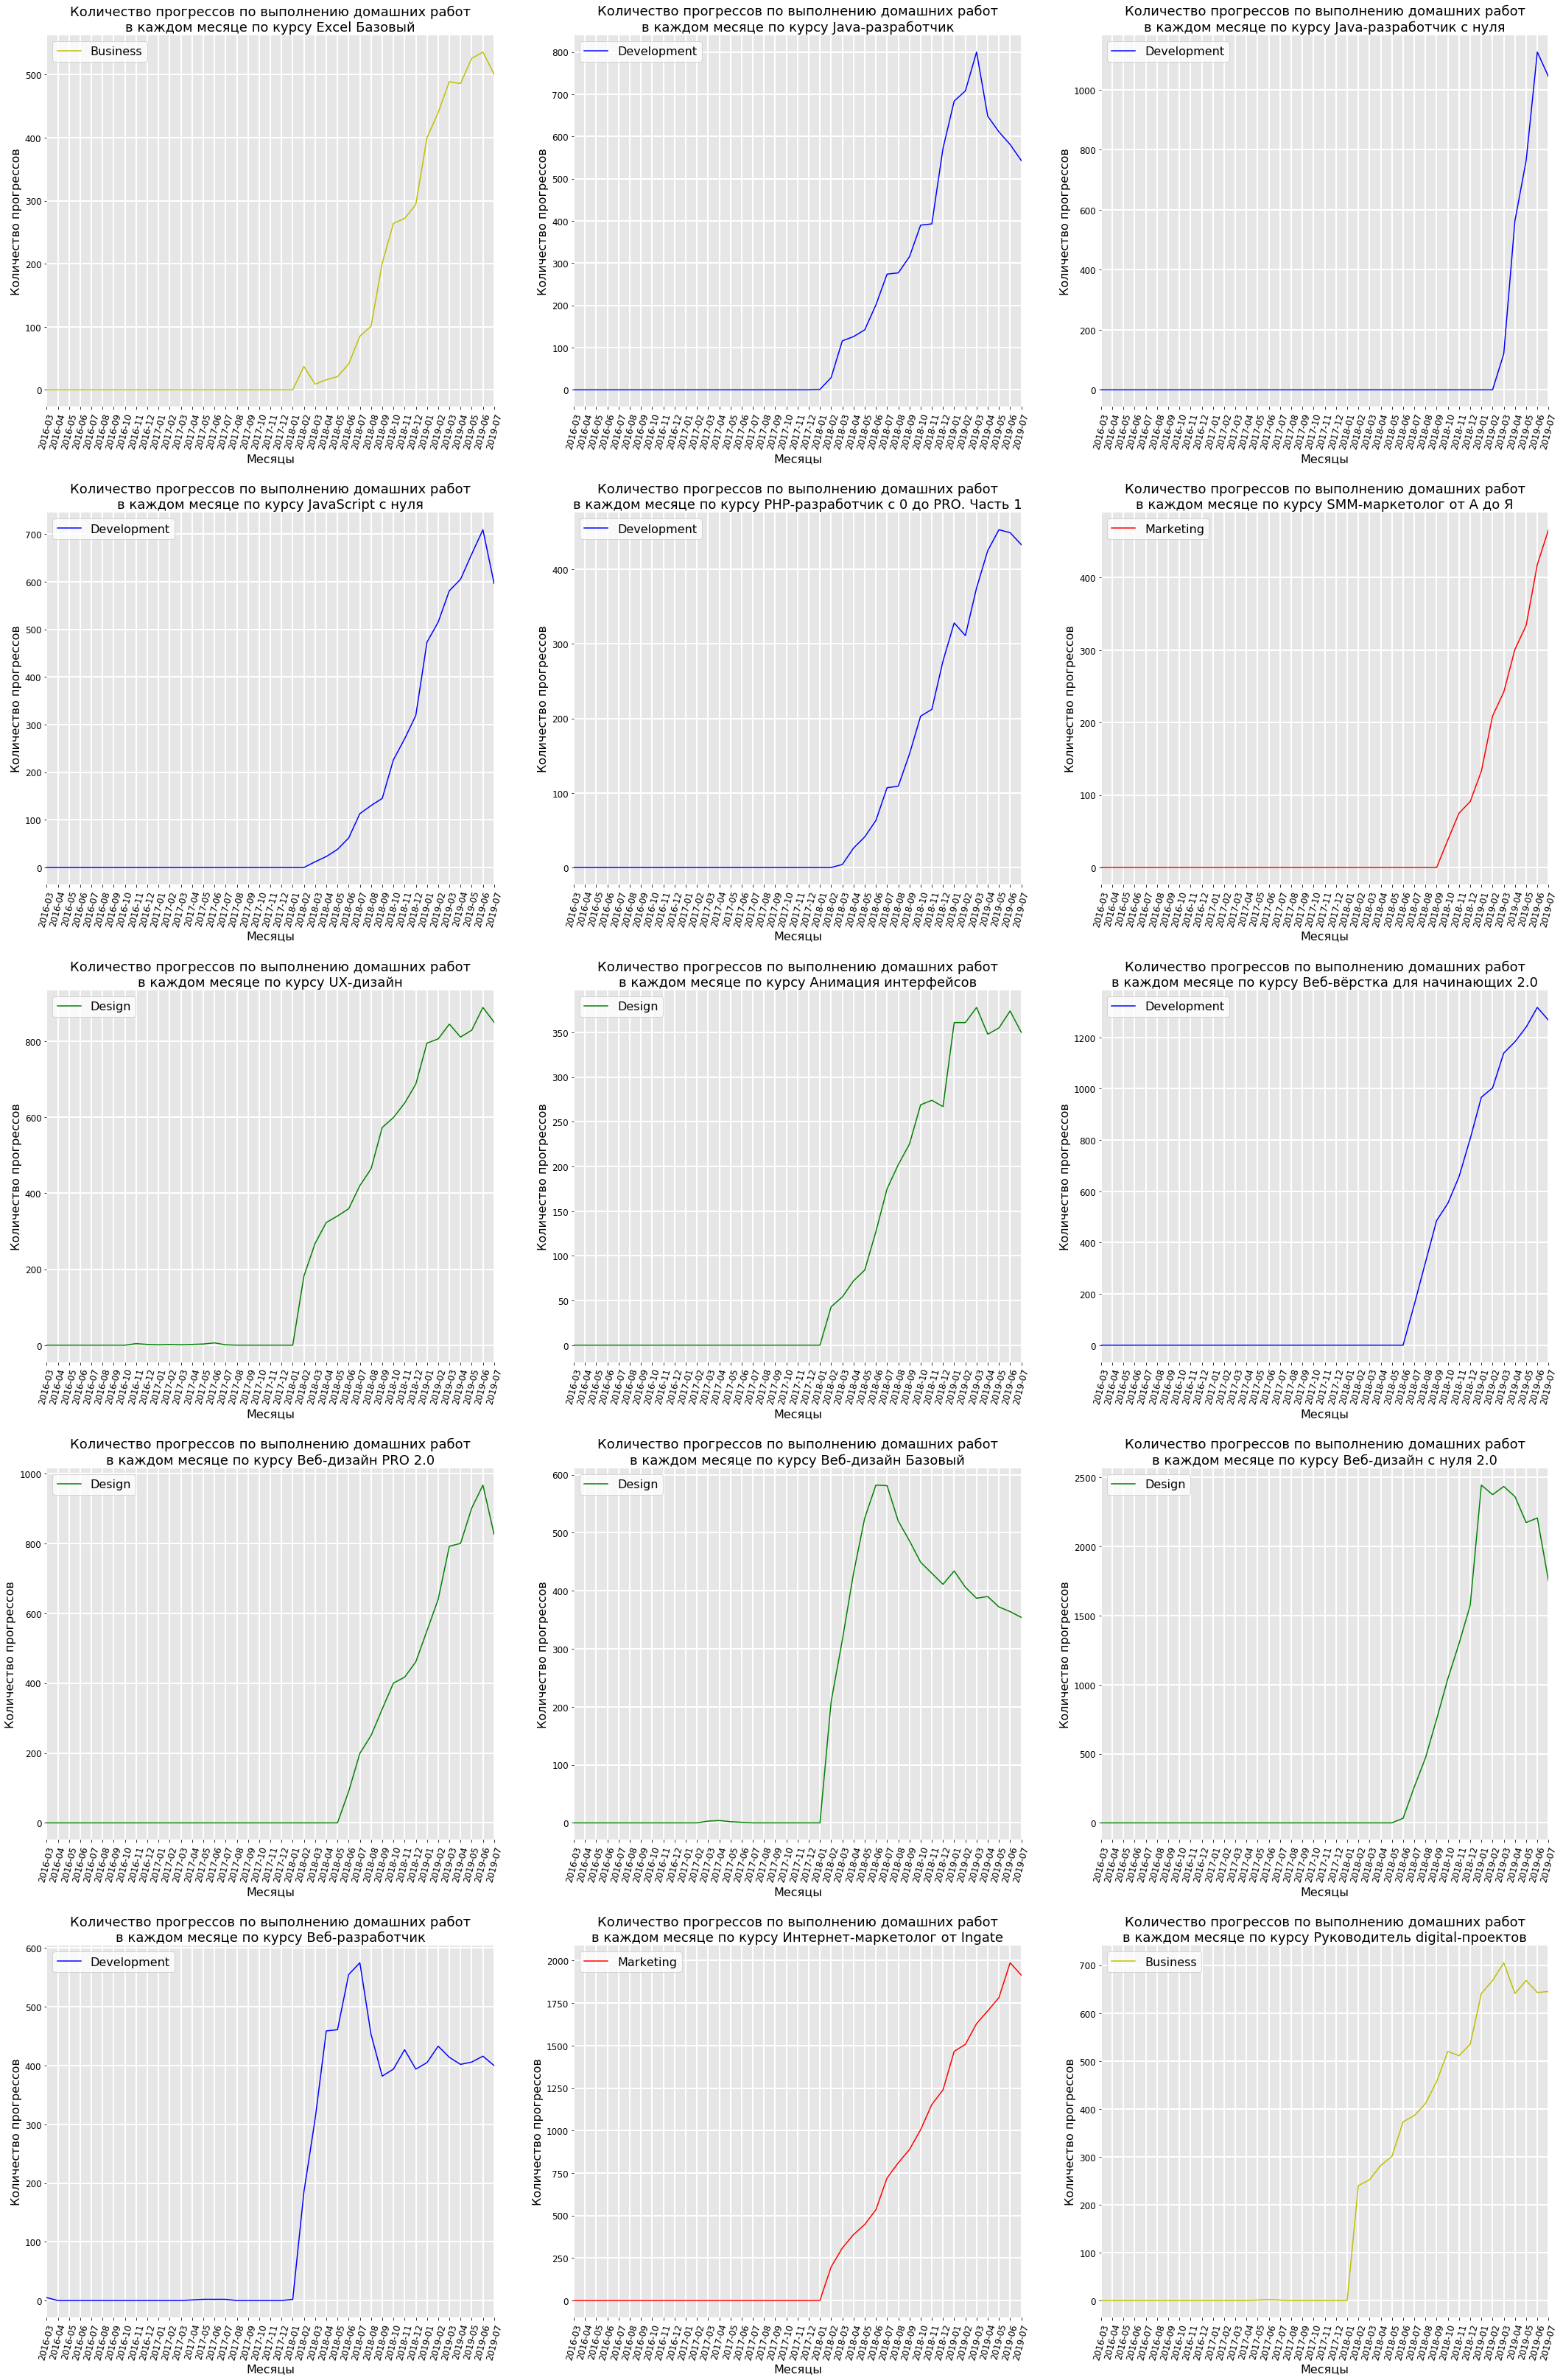

In [462]:
f,ax = plt.subplots(5, 3, figsize=(30,45))
course = iter(courses) # задаём итератор для перебора курсов
for row in range(5):
    for column in range(3):
        name = next(course) # запуск итератора
        plot = df_progress_all.loc[name].\
            plot(title=f'Количество прогрессов по выполнению домашних работ\nв каждом месяце по курсу {name}',
                 ax=ax[row, column],
                 layout=(row,column),
                 fontsize=16,
                 color=field_dict[df_progress_all.loc[name].index[0][0]]) # отрисовка графиков с параметрами
        ax[row,column].set_facecolor('.9') # фон полотен
        for spine in ax[row,column].spines.values():
            spine.set_visible(False) # убираем рамки
        plot.title.set_size(18)
        plot.set_xlabel('Месяцы', size=16)
        plot.set_ylabel('Количество прогрессов', size=16)
        plot.set_xticks(range(len(monthly_scale)))
        plot.set_xticklabels(monthly_scale, rotation=75)
        plot.set_xlim(0, len(monthly_scale)-1) # лимиты по оси x
        plot.tick_params(labelsize=12)
        plot.grid(color='white', linewidth=2)
        plot.legend([df_progress_all.loc[name].index[0][0]], loc=2, fontsize=16)
plt.tight_layout(h_pad=2.5, w_pad=0.1)
plt.show()

### 2.6 Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

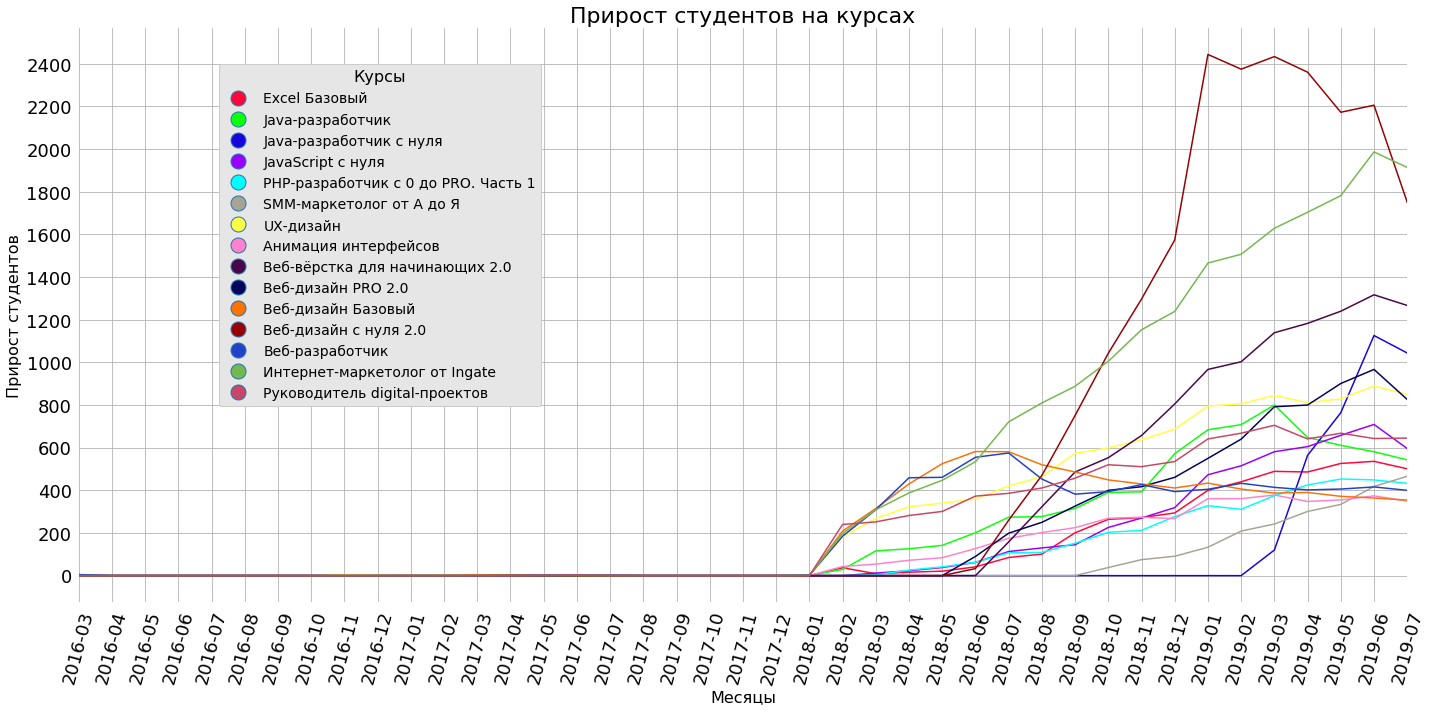

In [467]:
plt.figure(figsize=(20,10))
ax = plt.axes()
for course in courses:
    plt.plot(monthly_scale_list,
             df_progress_all.loc[course].droplevel(0).values,
             label=course,
             color=color_map[course]) # отрисовка графиков с параметрами
plt.title(f'Прирост студентов на курсах', size=22)
plt.xlabel('Месяцы', size=16)
plt.ylabel('Прирост студентов', size=16)
plt.xticks(range(len(monthly_scale)), monthly_scale, rotation=75)
plt.yticks(range(0, 2500, 200))
plt.xlim(0, len(monthly_scale)-1) # лимиты по оси x
plt.tick_params(labelsize=18)
for spine in ax.spines.values():
    spine.set_visible(False) # убираем рамки
ax.xaxis.set_ticks_position('none') # убираем тикеты с оси x
ax.yaxis.set_ticks_position('none') # убираем тикеты с оси y
plt.legend(markers, courses,
           loc=2,
           bbox_to_anchor=(0.1, 0.95),
           title='Курсы',
           fontsize=14,
           title_fontsize=16,
           framealpha=1, # прозрачность рамки
           frameon=True, # видимость рамки
           facecolor='.9',
           fancybox=True) # скругление углов
plt.grid()
plt.tight_layout()
plt.show()

### 2.7 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## 3. Выявление проблемных модулей

[3.1 **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле](#3.1-Рассчитать-минимальное,-максимальное,-среднее,-медианное-время-прохождения-каждого-модуля-(разность-между-временем-начала-и-окончания-выполнения-домашней-работы)-для-каждого-курса.-Если-домашних-заданий-в-модуле-несколько,-то-считать-разность-между-временем-начала-выполнения-первой-домашней-работы-и-временем-окончания-выполнения-последней-домашней-работы-в-модуле)<br>
[3.2 **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки](#3.2-На-основании-первого-пункта-построить-line-graph-с-медианным-временем-прохождения-каждого-модуля-для-каждого-курса.-15-графиков.-Графики-должны-иметь-заголовки)<br>
[3.3 **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса](#3.3-Чтобы-выявить-сезонность,-посчитать-медианное-время-выполнения-домашней-работы-по-месяцам-(12-месяцев,-январь-декабрь)-для-каждого-курса)<br>
[3.4 **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐](#3.4-На-основании-третьего-пункта-построить-line-graph,-на-который-будут-нанесены-линии-для-каждого-курса-с-медианным-временем-выполнения-домашней-работы-по-месяцам.-15-линий-на-графике.-График-должен-иметь-заголовок.-Ось,-отражающая-время-прохождения,-должна-быть-подписана.-Линия-для-каждого-курса-должна-иметь-свой-цвет-(нужна-легенда).-Рамок-у-графика-быть-не-должно-⭐)<br>
[3.5 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)](#3.5-На-основании-рассчитанных-значений-сделайте-аналитический-вывод-(должен-быть-полным-и-покрывать-все-полученные-выше-метрики))

### 3.1 Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [1027]:
df_students_month.course_title.unique()

array(['Веб-дизайн PRO 2.0', 'Интернет-маркетолог от Ingate',
       'Веб-дизайн с нуля 2.0', 'UX-дизайн', 'Анимация интерфейсов',
       'Веб-разработчик', 'Руководитель digital-проектов',
       'Excel Базовый', 'SMM-маркетолог от А до Я', 'JavaScript с нуля',
       'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн Базовый',
       'PHP-разработчик с 0 до PRO. Часть 1', 'Java-разработчик',
       'Java-разработчик c нуля'], dtype=object)

Прежде всего, отбросим всех студентов, которые не сделали или недоделали д/з в каких либо модулях, для того чтобы статистика была более правдивой. Для этого оставим только те строки, в которых статус (значения в колонке `status`) выполнения работы стоит `done`

In [1149]:
df_passing_modules = df_students_month[['course_title',
                                        'module_title',
                                        'module_number',
                                        'student_id',
                                        'lesson_title',
                                        'lesson_number',
                                        'start_date',
                                        'finish_date']]\
                                      [df_students_month.status.eq('done')]
df_passing_modules

,course_title,module_title,module_number,student_id,lesson_title,lesson_number,start_date,finish_date
4,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,1,768c2987a744c51ce64a5993a2a94eaf,Домашняя работа,6,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00
17,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,f69e2707b7ba94d49ca03ea9ed52ea5d,Домашняя работа,7,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00
29,Веб-дизайн с нуля 2.0,Основы работы с графикой,7,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-02 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00
37,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,13,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,6,2019-01-14 15:59:10.737967+00:00,2019-01-23 06:22:01.837609+00:00
38,Веб-дизайн с нуля 2.0,Формы и кнопки,12,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-09 20:23:30.413974+00:00,2019-01-17 08:27:10.791105+00:00
...,...,...,...,...,...,...,...,...
350640,Веб-дизайн с нуля 2.0,Введение и первый результат,1,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,9,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00
350642,Веб-дизайн с нуля 2.0,Работа со стилями. Создание GUI,4,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,5,2019-06-18 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00
350659,Веб-дизайн с нуля 2.0,"Тренды, подготовка, мудборды",3,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,4,2019-06-04 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00
350665,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,25ec58029696f8b7de38d22e5e01c7ea,Домашняя работа,7,2019-06-29 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00


Теперь рассмотрим курсы, в которых в одном модуле содержится несколько уроков. Проверим, все ли уроки в таких модулях были сделаны студентами, ведь модуль можно считать выполненным полностью только в том случае, если **все уроки с д/з в нём выполнены**. Если хоть какой-то урок в таком модуле не сделан каким-либо студентом, то мы такого студента брать в расчёт не будем. Т.е. другими словами, нам необходимо отфильтровать датафрейм таким образом, чтобы в нём остались только те студенты, которые сделали все д/з в в тех модулях, в которых содержится несколько уроков с домашними заданиями.

Как мы уже выяснили ранее в [п.1.1.3](#1.1.3-Количество-уроков-в-каждом-модуле-на-каждом-курсе), в некоторых курсах есть такие модули, в которых не одно д/з, а сразу несклько уроков с д/з. Например, курс **''Java-разработчик с нуля''**. Очевидно, что считать модуль пройденным студеном можно только тогда, когда **все** уроки с д/з в данном модуле выполнены этим студентом. Иначе, модуль не пройден, и мы таких студентов в расчёт брать не будем.

Посмотрим ещё раз на датафрейм в разрезе модулей, которые содержат сразу несколько д/з

In [1148]:
# группируем датафрейм и аггрегируем по количеству уникальных названий уроков и номеров уроков
df_not_one_hw = df_passing_modules.groupby(['course_title', 'module_title', 'module_number'])\
                                  .agg({'lesson_title':'nunique', 'lesson_number':'nunique'})
# выводим только те курсы и модули в них, в которых количество уроков с д/з в пределах одного модуля больше одного
df_not_one_hw[(df_not_one_hw.lesson_title > 1) | (df_not_one_hw.lesson_number > 1)].add_suffix('_count')

lesson_title_count  \
course_title            module_title                                     module_number                       
Java-разработчик c нуля Исключения, отладка, тестирование и логгирование 8                               1   
                        Массивы и коллекции                              5                               5   
                        Наследование и полиморфизм                       6                               1   
                        Особенности ООП в Java                           7                               1   
                        Работа с файлами и сетью                         9                               1   
                        Числа, строки и даты                             4                               6   
UX-дизайн               Concept design: творчество в дизайне             9                               2   
Веб-дизайн PRO 2.0       Введение в UX                                   4                               2   

                                                                                        lesson_number_count  
course_title            module_title                                     module_number                       
Java-разработчик c нуля Исключения, отладка, тестирование и логгирование 8                                3  
                        Массивы и коллекции                              5                                5  
                        Наследование и полиморфизм                       6                                4  
                        Особенности ООП в Java                           7                                2  
                        Работа с файлами и сетью                         9                                5  
                        Числа, строки и даты                             4                                6  
UX-дизайн               Concept design: творчество в дизайне             9                                2  
Веб-дизайн PRO 2.0       Введение в UX                                   4                                2

Здесь явно видно, что курсы **Java-разработчик c нуля**, **UX-дизайн** и **Веб-дизайн PRO 2.0** имеют модули в которых больше одного урока с д/з. Причём, стоит также отметить что количество номеров уроков всегда не меньше, чем количество названий уроков. Поэтому, будем ориентироваться именно на колонку `lesson_number` при формировании условий выборки для основного датафрейма.

А теперь уберём из датафрейма тех студентов, у которых на вышеуказанных курсах, у которых выполнены не все д/з в модулях, в которых более одного д/з.

In [1185]:
df_not_one_hw = df_not_one_hw[(df_not_one_hw.lesson_title > 1) | (df_not_one_hw.lesson_number > 1)].add_suffix('_count')

In [1210]:
merged = df_passing_modules.merge(df_not_one_hw.reset_index().drop('lesson_title_count', axis=1), how='left', on=['course_title','module_title','module_number'])

In [1212]:
merged.fillna({'lesson_number_count':1}, inplace=True)

In [1227]:
merged

,course_title,module_title,module_number,student_id,lesson_title,lesson_number,start_date,finish_date,lesson_number_count
0,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,1,768c2987a744c51ce64a5993a2a94eaf,Домашняя работа,6,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,1.0
1,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,f69e2707b7ba94d49ca03ea9ed52ea5d,Домашняя работа,7,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,1.0
2,Веб-дизайн с нуля 2.0,Основы работы с графикой,7,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-02 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00,1.0
3,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,13,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,6,2019-01-14 15:59:10.737967+00:00,2019-01-23 06:22:01.837609+00:00,1.0
4,Веб-дизайн с нуля 2.0,Формы и кнопки,12,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-09 20:23:30.413974+00:00,2019-01-17 08:27:10.791105+00:00,1.0
...,...,...,...,...,...,...,...,...,...
44920,Веб-дизайн с нуля 2.0,Введение и первый результат,1,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,9,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,1.0
44921,Веб-дизайн с нуля 2.0,Работа со стилями. Создание GUI,4,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,5,2019-06-18 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00,1.0
44922,Веб-дизайн с нуля 2.0,"Тренды, подготовка, мудборды",3,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,4,2019-06-04 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00,1.0
44923,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,25ec58029696f8b7de38d22e5e01c7ea,Домашняя работа,7,2019-06-29 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00,1.0


In [1239]:
merged1 = merged.groupby(['student_id', 'course_title', 'module_number']).agg({'lesson_number':'nunique', 'lesson_number_count':'max'}).reset_index()

In [1242]:
merged1[merged1.course_title == 'Java-разработчик c нуля']

,student_id,course_title,module_number,lesson_number,lesson_number_count
41,00700f1e78ee577370c6fa5cea8ebd5a,Java-разработчик c нуля,1,1,1.0
42,00700f1e78ee577370c6fa5cea8ebd5a,Java-разработчик c нуля,2,1,1.0
76,009b2f4c398988e3607b114f79b33c94,Java-разработчик c нуля,1,1,1.0
250,01fe2d6bc9a8043faa47c17a0be51b65,Java-разработчик c нуля,1,1,1.0
251,01fe2d6bc9a8043faa47c17a0be51b65,Java-разработчик c нуля,2,1,1.0
...,...,...,...,...,...
43191,fe95bd1e7a328c7de6970b4a4e7bc370,Java-разработчик c нуля,1,1,1.0
43192,fe95bd1e7a328c7de6970b4a4e7bc370,Java-разработчик c нуля,2,1,1.0
43193,fe95bd1e7a328c7de6970b4a4e7bc370,Java-разработчик c нуля,3,1,1.0
43194,fe95bd1e7a328c7de6970b4a4e7bc370,Java-разработчик c нуля,4,3,6.0


In [ ]:
for alpha in 'Java-разработчик c нуля':
    

In [ ]:
merged

In [1191]:
for crs in df_not_one_hw.index:
    print(crs[0])

Java-разработчик c нуля
Java-разработчик c нуля
Java-разработчик c нуля
Java-разработчик c нуля
Java-разработчик c нуля
Java-разработчик c нуля
UX-дизайн
Веб-дизайн PRO 2.0


In [1194]:
df_not_one_hw.loc['Java-разработчик c нуля']

,,lesson_title_count,lesson_number_count
module_title,module_number,,
"Исключения, отладка, тестирование и логгирование",8,1,3
Массивы и коллекции,5,5,5
Наследование и полиморфизм,6,1,4
Особенности ООП в Java,7,1,2
Работа с файлами и сетью,9,1,5
"Числа, строки и даты",4,6,6


In [1151]:
df_passing_modules_df_passing_modules.groupby(['course_title', 'student_id', 'module_number'])\
                                  .agg({'lesson_number':'nunique'}) > 1

lesson_number
course_title                  student_id                       module_number               
Excel Базовый                 001b192f899a84496be98b41906246fc 1                      False
                              006f0189ec657741ee4d53474c7a258d 1                      False
                                                               2                      False
                                                               3                      False
                                                               4                      False
...                                                                                     ...
Руководитель digital-проектов ff7f326a0547ac061779ea5685aec73b 4                      False
                                                               5                      False
                                                               6                      False
                                                               7                      False
                                                               8                      False

[43427 rows x 1 columns]

In [1179]:
df_passing_modules[(df_passing_modules.course_title.eq('Java-разработчик c нуля')) & (df_passing_modules.module_number.eq(5))]

,course_title,module_title,module_number,student_id,lesson_title,lesson_number,start_date,finish_date
2502,Java-разработчик c нуля,Массивы и коллекции,5,645e6de703f36a001242dad5040f9a94,Домашняя работа 5.3,9,2019-06-23 13:07:34.417991+00:00,2019-06-26 20:11:01.744275+00:00
2538,Java-разработчик c нуля,Массивы и коллекции,5,645e6de703f36a001242dad5040f9a94,Домашняя работа 5.1,5,2019-06-20 16:56:57.558642+00:00,2019-06-23 11:24:24.130363+00:00
2549,Java-разработчик c нуля,Массивы и коллекции,5,645e6de703f36a001242dad5040f9a94,Домашняя работа 5.2,7,2019-06-21 16:08:26.807243+00:00,2019-06-23 11:30:59.210088+00:00
6499,Java-разработчик c нуля,Массивы и коллекции,5,d26fc50fa8cea6d3d5b35616d4855538,Домашняя работа 5.3,9,2019-07-08 08:51:58.009468+00:00,2019-07-08 23:06:17.862626+00:00
6548,Java-разработчик c нуля,Массивы и коллекции,5,d26fc50fa8cea6d3d5b35616d4855538,Домашняя работа 5.4,11,2019-07-09 14:11:13.398007+00:00,2019-07-10 07:47:45.073215+00:00
...,...,...,...,...,...,...,...,...
350453,Java-разработчик c нуля,Массивы и коллекции,5,aa28498a5eee409e411f70c52fefed0a,Домашняя работа 5.2,7,2019-06-01 07:59:27.168067+00:00,2019-06-16 14:56:42.060522+00:00
350460,Java-разработчик c нуля,Массивы и коллекции,5,aa28498a5eee409e411f70c52fefed0a,Домашняя работа 5.5,13,2019-06-22 10:22:27.660074+00:00,2019-06-24 10:24:20.552410+00:00
350468,Java-разработчик c нуля,Массивы и коллекции,5,aa28498a5eee409e411f70c52fefed0a,Домашняя работа 5.4,11,2019-06-16 17:40:46.778894+00:00,2019-06-23 10:41:22.532386+00:00
350469,Java-разработчик c нуля,Массивы и коллекции,5,aa28498a5eee409e411f70c52fefed0a,Домашняя работа 5.1,5,2019-05-26 05:12:53.666158+00:00,2019-06-09 21:08:24.437850+00:00


In [1181]:
all((4, 5, 6 ,7))

True

In [1093]:
tmp2.loc['UX-дизайн'].reset_index(level=2).module_number.eq(9)

student_id                        module_title                                           lesson_title     lesson_number
00220bd7565b64bb24bd98537984512a  Service design: теория и практика                      Домашняя работа  5                False
                                  UX-проектирование. Исследование интерфейсов            Домашняя работа  6                False
                                  UX-проектирование. Паттерны и психология пользователя  Домашняя работа  4                False
                                  Основные этапы проекта                                 Домашняя работа  4                False
                                  Профессия дизайнера в эпоху цифровых перемен           Домашняя работа  8                False
                                                                                                                           ...  
ff6f1a3482fd8f2fb65132e9e0781639  Service design: теория и практика                      Домашняя работа  

In [1111]:
tmp2.loc['UX-дизайн']

start_date  \
student_id                       module_title                                       module_number lesson_title    lesson_number                                    
00220bd7565b64bb24bd98537984512a Service design: теория и практика                  3             Домашняя работа 5             2018-05-13 12:21:42.065018+00:00   
                                 UX-проектирование. Исследование интерфейсов        6             Домашняя работа 6             2018-06-05 18:30:43.533652+00:00   
                                 UX-проектирование. Паттерны и психология пользо... 4             Домашняя работа 4             2018-05-20 18:51:39.593812+00:00   
                                 Основные этапы проекта                             2             Домашняя работа 4             2018-05-06 18:11:09.286710+00:00   
                                 Профессия дизайнера в эпоху цифровых перемен       1             Домашняя работа 8             2018-04-30 14:16:09.933158+00:00   
...                                                                                                                                                          ...   
ff6f1a3482fd8f2fb65132e9e0781639 Service design: теория и практика                  3             Домашняя работа 5             2019-01-08 20:00:43.300584+00:00   
                                 UX-проектирование. Исследование интерфейсов        6             Домашняя работа 6             2019-02-25 07:41:13.179658+00:00   
                                 UX-проектирование. Паттерны и психология пользо... 4             Домашняя работа 4             2019-01-10 09:39:18.378208+00:00   
                                 Основные этапы проекта                             2             Домашняя работа 4             2019-01-08 16:57:42.792554+00:00   
                                 Профессия дизайнера в эпоху цифровых перемен       1             Домашняя работа 8             2018-12-24 04:57:21.968126+00:00   

                                                                                                                                                     finish_date  
student_id                       module_title                                       module_number lesson_title    lesson_number                                   
00220bd7565b64bb24bd98537984512a Service design: теория и практика                  3             Домашняя работа 5             2018-05-16 11:45:10.816888+00:00  
                                 UX-проектирование. Исследование интерфейсов        6             Домашняя работа 6             2018-07-11 06:31:52.485568+00:00  
                                 UX-проектирование. Паттерны и психология пользо... 4             Домашняя работа 4             2018-05-29 07:17:42.779024+00:00  
                                 Основные этапы проекта                             2             Домашняя работа 4             2018-05-07 13:06:43.860111+00:00  
                                 Профессия дизайнера в эпоху цифровых перемен       1             Домашняя работа 8             2018-05-03 06:16:41.450004+00:00  
...                                                                                                                                                          ...  
ff6f1a3482fd8f2fb65132e9e0781639 Service design: теория и практика                  3             Домашняя работа 5             2019-01-10 17:04:50.916767+00:00  
                                 UX-проектирование. Исследование интерфейсов        6             Домашняя работа 6             2019-02-28 20:23:03.395247+00:00  
                                 UX-проектирование. Паттерны и психология пользо... 4             Домашняя работа 4             2019-01-15 22:12:00.086573+00:00  
                                 Основные этапы проекта                             2             Домашняя работа 4             2019-01-09 12:25:19.461720+00:00  
                                 Профессия дизайнера в эпоху 

In [1110]:
tmp2.reset_index()[tmp2.reset_index().course_title.eq('UX-дизайн') & tmp2.reset_index().module_number.eq(9)]

,course_title,student_id,module_title,module_number,lesson_title,lesson_number,start_date,finish_date
10766,UX-дизайн,0205558ee53164cbc3c508b5853b383f,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-12-05 13:41:53.420907+00:00,2019-03-08 07:40:00.224327+00:00
10788,UX-дизайн,0344d3d92ba0f7cc535d5f3cd24fa37f,Concept design: творчество в дизайне,9,Домашняя работа (вторая часть),8,2019-02-24 12:17:35.048567+00:00,2019-03-01 09:31:13.028838+00:00
10789,UX-дизайн,0344d3d92ba0f7cc535d5f3cd24fa37f,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-12-18 04:24:11.988288+00:00,2019-02-16 05:46:45.833903+00:00
10802,UX-дизайн,0381dcf8073398c751bb4443e7a3677b,Concept design: творчество в дизайне,9,Домашняя работа (вторая часть),8,2019-02-19 19:24:03.999877+00:00,2019-03-08 07:21:09.991458+00:00
10803,UX-дизайн,0381dcf8073398c751bb4443e7a3677b,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-10-20 11:37:47.591166+00:00,2018-11-27 15:24:40.651883+00:00
...,...,...,...,...,...,...,...,...
13121,UX-дизайн,f4cb6041c9b4b49c3ade553419427440,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-08-05 13:38:20.294965+00:00,2018-10-27 10:42:32.971731+00:00
13134,UX-дизайн,f5dd5dcfb6b6c8858f124c6f5c6ddb57,Concept design: творчество в дизайне,9,Домашняя работа (вторая часть),8,2019-03-31 15:42:01.249546+00:00,2019-04-23 07:48:06.502057+00:00
13135,UX-дизайн,f5dd5dcfb6b6c8858f124c6f5c6ddb57,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-11-19 13:15:33.192712+00:00,2019-03-31 05:49:42.071448+00:00
13178,UX-дизайн,f9fecd4f2d89ce30b33dfaf33234f87c,Concept design: творчество в дизайне,9,Домашняя работа (первая часть),7,2018-06-27 14:23:04.414515+00:00,2018-09-01 15:03:05.244758+00:00


In [934]:
df_passing_modules.passing_time.max().round('D')

Timedelta('484 days 00:00:00')

In [932]:
df_passing_modules = df_passing_modules.assign(passing_time=lambda row: row.finish_date - row.start_date)

In [950]:
df_passing_modules

,course_title,module_title,module_number,student_id,lesson_title,lesson_number,start_date,finish_date
4,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,1,768c2987a744c51ce64a5993a2a94eaf,Домашняя работа,6,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00
17,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,f69e2707b7ba94d49ca03ea9ed52ea5d,Домашняя работа,7,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00
29,Веб-дизайн с нуля 2.0,Основы работы с графикой,7,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-02 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00
37,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,13,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,6,2019-01-14 15:59:10.737967+00:00,2019-01-23 06:22:01.837609+00:00
38,Веб-дизайн с нуля 2.0,Формы и кнопки,12,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,5,2018-10-09 20:23:30.413974+00:00,2019-01-17 08:27:10.791105+00:00
...,...,...,...,...,...,...,...,...
350640,Веб-дизайн с нуля 2.0,Введение и первый результат,1,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,9,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00
350642,Веб-дизайн с нуля 2.0,Работа со стилями. Создание GUI,4,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,5,2019-06-18 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00
350659,Веб-дизайн с нуля 2.0,"Тренды, подготовка, мудборды",3,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,4,2019-06-04 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00
350665,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,25ec58029696f8b7de38d22e5e01c7ea,Домашняя работа,7,2019-06-29 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00


In [935]:
df_passing_modules = df_passing_modules.assign(passing_time=df_passing_modules.apply(lambda x: x.passing_time.round('D').days, axis=1))

In [936]:
df_passing_modules

,course_title,module_title,module_number,student_id,lesson_title,start_date,finish_date,passing_time
4,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,1,768c2987a744c51ce64a5993a2a94eaf,Домашняя работа,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,7
17,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,f69e2707b7ba94d49ca03ea9ed52ea5d,Домашняя работа,2018-02-19 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,1
29,Веб-дизайн с нуля 2.0,Основы работы с графикой,7,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,2018-10-02 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00,3
37,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,13,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,2019-01-14 15:59:10.737967+00:00,2019-01-23 06:22:01.837609+00:00,9
38,Веб-дизайн с нуля 2.0,Формы и кнопки,12,fcd7b6853c2582372980dd6af56d3bdc,Домашняя работа,2018-10-09 20:23:30.413974+00:00,2019-01-17 08:27:10.791105+00:00,100
...,...,...,...,...,...,...,...,...
350640,Веб-дизайн с нуля 2.0,Введение и первый результат,1,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,2019-05-28 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,7
350642,Веб-дизайн с нуля 2.0,Работа со стилями. Создание GUI,4,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,2019-06-18 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00,0
350659,Веб-дизайн с нуля 2.0,"Тренды, подготовка, мудборды",3,ab6cc20a19933a22031732f86982f4d2,Домашняя работа,2019-06-04 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00,6
350665,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",1,25ec58029696f8b7de38d22e5e01c7ea,Домашняя работа,2019-06-29 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00,2


In [946]:
df_passing_modules.groupby(['course_title', 'module_title', 'module_number']).passing_time.agg(['min', 'max', 'mean', 'median']).loc['Java-разработчик c нуля']

,,min,max,mean,median
module_title,module_number,,,,
Вводный модуль,1,0,107,9.745583,4.0
"Исключения, отладка, тестирование и логгирование",8,1,35,6.439394,5.0
Массивы и коллекции,5,0,46,4.486175,3.0
Наследование и полиморфизм,6,0,70,4.637131,3.0
Объекты и классы,3,0,96,11.073333,7.0
Особенности ООП в Java,7,0,29,4.383721,3.0
Работа с файлами и сетью,9,0,14,3.322581,3.0
Синтаксис языка,2,0,84,8.040724,4.0
"Числа, строки и даты",4,0,67,3.618986,1.0


In [960]:
tmp2 = df_passing_modules.groupby(['course_title', 'student_id', 'module_title', 'module_number', 'lesson_title', 'lesson_number']).agg({'start_date':'min', 'finish_date':'max'})

In [969]:
tmp2.loc['Java-разработчик c нуля'].loc['fe95bd1e7a328c7de6970b4a4e7bc370'].loc['Числа, строки и даты'].groupby('module_number').agg({'start_date':'min', 'finish_date':'max'})

start_date  \
module_number lesson_title        lesson_number                                    
4             Домашняя работа 4.1 6             2019-06-08 10:01:41.048994+00:00   
              Домашняя работа 4.2 13            2019-06-22 17:10:18.954122+00:00   
              Домашняя работа 4.3 17            2019-06-22 21:30:38.743350+00:00   

                                                                     finish_date  
module_number lesson_title        lesson_number                                   
4             Домашняя работа 4.1 6             2019-06-20 07:40:00.482086+00:00  
              Домашняя работа 4.2 13            2019-06-23 21:44:07.133327+00:00  
              Домашняя работа 4.3 17            2019-07-08 08:23:02.286201+00:00

In [970]:
tmp2.loc['Java-разработчик c нуля'].loc['fe95bd1e7a328c7de6970b4a4e7bc370'].loc['Числа, строки и даты'].groupby('module_number').agg({'start_date':'min', 'finish_date':'max'})

,start_date,finish_date
module_number,,
4,2019-06-08 10:01:41.048994+00:00,2019-07-08 08:23:02.286201+00:00


In [838]:
np.mean(df_passing_modules.passing_time.iloc[:3])

Timedelta('3 days 12:58:56.983935')

In [865]:
np.array([1, 2, 3]).shape

(3,)

In [898]:
df_passing_modules.apply(lambda x: x.passing_time.days, axis=1)

4          6
17         0
29         2
37         8
38        99
          ..
350640     6
350642     0
350659     5
350665     1
350667    13
Length: 44925, dtype: int64

In [872]:
tmp = df_passing_modules.groupby(['course_title', 'module_title', 'module_number']).passing_time.agg([np.min, np.max, np.mean])

DataError: No numeric types to aggregate

In [853]:
tmp.to_frame()

passing_time
course_title                  module_title                                       module_number                          
Excel Базовый                  Визуализация данных Excel                         7             4 days 14:49:23.608582500
                              Основной функционал Excel                          1                2 days 07:24:50.049678
                              Основной функционал Excel (продолжение)            2             1 days 20:24:06.134843500
                              Сводные таблицы Excel                              8                2 days 21:33:42.186444
                              Формулы и функции Excel. Более сложные формулы     5             2 days 23:30:55.474674500
...                                                                                                                  ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12               7 days 00:41:40.763640
                              Требовательность digital-продюсера                 3                7 days 19:40:14.941651
                              Управление временем                                9                3 days 23:08:30.204910
                              Управление дизайнерами. Разработка дизайна по s... 14            7 days 18:42:35.495710500
                              Экологичный путь менеджера                         1             2 days 14:20:41.928605500

[190 rows x 1 columns]

In [810]:
df_passing_modules.pivot_table(index=['course_title', 'module_title', 'module_number', 'student_id'], columns=['start_date','finish_date'], aggfunc=lambda x: x)

KeyboardInterrupt: 

In [807]:
tmp.finish_date - tmp.start_date

4         6 days 20:48:48.362527
17        0 days 20:46:15.658938
29        2 days 21:21:46.930340
37        8 days 14:22:51.099642
38       99 days 12:03:40.377131
                   ...          
350640    6 days 12:21:55.670470
350642    0 days 10:19:14.616760
350659    5 days 23:05:15.206738
350665    1 days 12:41:45.640332
350667   13 days 16:26:40.065037
Length: 44925, dtype: timedelta64[ns]

In [572]:
df_passing_modules.passing_time.iloc[1]

Timedelta('0 days 20:46:15.658938')

In [560]:
df_passing_modules.passing_time.iloc[0] + df_passing_modules.passing_time.iloc[1]

Timedelta('395 days 20:22:30.400854')

In [510]:
df_passing_modules.loc[:, 'start_date'].values

array(['2018-06-21T19:10:36.957891000', '2018-06-23T08:31:00.338883000',
       '2018-03-11T14:14:44.814222000', ...,
       '2019-06-04T15:35:10.566121000', '2019-06-29T18:58:02.292673000',
       '2019-07-02T21:06:01.673478000'], dtype='datetime64[ns]')

In [586]:
df_passing_modules.set_index(['course_title', 'module_title', 'module_number', 'lesson_title']).sort_index(level=0).head(50)

start_date  \
course_title  module_title               module_number lesson_title                                       
Excel Базовый  Визуализация данных Excel 7             Домашняя работа 2019-01-19 06:17:52.525892+00:00   
                                                       Домашняя работа 2019-05-30 08:37:42.412629+00:00   
                                                       Домашняя работа 2019-07-09 16:24:35.745338+00:00   
                                                       Домашняя работа 2019-02-20 12:34:22.892813+00:00   
                                                       Домашняя работа 2019-04-25 07:23:52.197887+00:00   
                                                       Домашняя работа 2018-10-14 11:46:25.381793+00:00   
                                                       Домашняя работа 2019-05-13 07:55:50.239715+00:00   
                                                       Домашняя работа 2018-10-01 17:46:58.576347+00:00   
                                                       Домашняя работа 2018-12-24 14:09:58.157279+00:00   
                                                       Домашняя работа 2019-01-09 09:29:15.602058+00:00   
                                                       Домашняя работа 2019-05-29 07:22:58.019597+00:00   
                                                       Домашняя работа 2019-02-26 06:32:12.533323+00:00   
                                                       Домашняя работа 2018-06-07 13:01:39.608639+00:00   
                                                       Домашняя работа 2018-11-01 03:40:25.035200+00:00   
                                                       Домашняя работа 2019-07-02 21:44:41.807444+00:00   
                                                       Домашняя работа 2019-01-10 12:40:46.580019+00:00   
                                                       Домашняя работа 2019-06-05 20:17:49.107505+00:00   
                                                       Домашняя работа 2019-02-24 12:13:05.168649+00:00   
                                                       Домашняя работа 2019-01-21 09:46:32.477342+00:00   
                                                       Домашняя работа 2019-06-16 21:27:45.680367+00:00   
                                                       Домашняя работа 2018-04-16 11:34:36.908444+00:00   
                                                       Домашняя работа 2019-03-27 19:09:56.127689+00:00   
                                                       Домашняя работа 2018-02-20 11:51:56.046325+00:00   
                                                       Домашняя работа 2018-02-26 11:12:42.799380+00:00   
                                                       Домашняя работа 2019-06-28 02:06:45.969985+00:00   
                                                       Домашняя работа 2019-05-07 17:26:09.858756+00:00   
                                                       Домашняя работа 2018-10-02 07:58:59.124733+00:00   
                                                       Домашняя работа 2019-03-16 18:54:46.920291+00:00   
                                                       Домашняя работа 2018-08-06 18:40:18.518910+00:00   
                                                       Домашняя работа 2019-03-06 10:25:11.864284+00:00   
                                                       Домашняя работа 2019-02-19 13:08:07.705244+00:00   
                                                       Домашняя работа 2019-05-19 12:31:41.835491+00:00   
                                                       Домашняя работа 2018-09-02 20:09:17.361060+00:00   
                                                       Домашняя работа 2018-12-31 15:37:53.054678+00:00   
                                                       Домашняя работа 2019-02-25 13:29:36.574588+00:00   
                                                       Домашняя работа 2019-04-25 05:38:13.923324+00:00   
                           

In [ ]:
df_passing_modules.sort_index()

In [625]:
df_passing_modules.groupby(['course_title', 'module_title', 'module_number', 'student_id']).agg({'lesson_title':'unique', 'start_date':'unique', 'finish_date':'unique'}).loc['Java-разработчик c нуля']

AttributeError: 'unique' is not a valid function for 'DataFrameGroupBy' object

In [607]:
df_passing_modules.groupby(['course_title', 'module_title', 'module_number', 'student_id']).agg(lambda row: row.unique()).loc['Java-разработчик c нуля'].loc['Числа, строки и даты'].head(50)

lesson_title  \
module_number student_id                                                                            
4             03802954ea7d0a7de28272a8b3986ebe  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              088292a59a08f542ac155a7f648ca251  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              08ca1f498a3b65c1c81ed199b34d2b93  [Домашняя работа 4.5, Домашняя работа 4.1, Дом...   
              0a86a9e670ea1eeab20c1d26097c6da6  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              0ace9a38cc0fe905d760c46ba89a9c54  [Домашняя работа 4.5, Домашняя работа 4.1, Дом...   
              0ba029d1ed51f944546d4b7f8f5447aa  [Домашняя работа 4.2, Домашняя работа 4.1, Дом...   
              0ba5e61ea012b0eddc9f88df22b4fcad  [Домашняя работа 4.5, Домашняя работа 4.1, Дом...   
              0ce0512ba15a890176fd9c6ef7afe966  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              0ce297ac3d9cb5fa9c0739a5a198b4d3  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              0e3adf73429db652d3f5d1b189236031                                Домашняя работа 4.1   
              10c826e7416f91c4e7e66b3b5a2bd277         [Домашняя работа 4.1, Домашняя работа 4.2]   
              10d60d5bd2510fedc5d64b30cfdd3b9c  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              1776778af511c0edeb963ada108cb00c  [Домашняя работа 4.2, Домашняя работа 4.1, Дом...   
              195126515ff069513aca47554bf87070  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              1a0acf593d0a38155bafdf29e3cba338  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              1ac58b48ed96e5e8620cbcf821f7c9ca  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              1ad7607085c33545d0e8f6bcab927143  [Домашняя работа 4.2, Домашняя работа 4.1, Дом...   
              1b3eb643e4b4b907f4db4ac9458fbab3  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              1cbf84a6708e150f00286caae3e17cd2  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              1ce36c736eef5306fa9c825f80c2ca63  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              1d0777c4f014379fef5c72c4a583f237  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              1eedc47bf01f875e84b144f1b9e87c6e  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              1f660e3704f61c7a31b1a75bb67b3f27  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              1fd29ddde847287175dbc1a383c9d07e  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              2001d04521e36dc6e067df5bb89e48de  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              218b16891b899cce91f18049586f5a65  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              22e98837f6d66a798825f21af8987364  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              2404303ddd123c21c0c4fb3d0bf92eef  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              2509726beba446b93abd45908f96004c  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              25df35af8d731cf76e20672f55908fb1  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              279c398512a3c6d675dae22d972a6e40  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              29a1e03dcaa84725c38761891859d1a7  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              2cc50a4189d0cd0e629255b9ef551f22  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              2cd1bf49965aacf829cb5a46f5d167af  [Домашняя работа 4.5, Домашняя работа 4.1, Дом...   
              2ed03f6827f81b2f2dfe3d36db8066f9  [Домашняя работа 4.6, Домашняя работа 4.4, Дом...   
              30f62d1825271ceda1c25bffb142d9d0  [Домашняя работа 4.1, Домашняя работа 4.3, Дом...   
              32a53747ce2f34ea33a153205fa62ae9  [Домашняя работа 4.5, Домашняя работа 4.1, Дом...   
              3392a53fff76c445042fe5e3d7ee84f3  [Домашняя работа 4.5, Домашняя работа 4.6, Дом...   
              39a7f78639cb549cd5f493a43bee797

In [ ]:
df_passing_modules.agg

### 3.2 На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

### 3.3 Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса

### 3.4 На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

### 3.5 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## 4. Расчет конверсии

[4.1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле)](#4.1-Посчитать-конверсию-перехода-студентов-из-одного-модуля-в-другой-на-каждом-курсе.-Формула:-отношение-количества-студентов,-приступивших-к-выполнению-домашнего-задания-в-этом-модуле-(если-дз-в-модуле-несколько,-то-считать-по-первому-дз-в-модуле),-к-количеству-студентов,-сдавших-задание-в-предыдущем-модуле-(если-дз-в-модуле-несколько,-то-считать-по-последнему-дз-в-модуле))<br>
[4.2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы](#4.2-Постройте-bar-chart,-отражающий-конверсию-перехода-студентов-из-одного-модуля-в-другой-на-каждом-курсе.-График-должен-иметь-заголовок.-Ticks-нужно-развернуть-так,-чтобы-они-были-читаемы)<br>
[4.3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐](#4.3-Постройте-горизонтальный-(столбцы-должны-располагаться-горизонтально)-bar-chart,-отражающий-конверсию-перехода-студентов-из-одного-модуля-в-другой-на-каждом-курсе.-15-графиков.-Графики-должны-иметь-заголовки.-Ticks-должны-содержать-номер-и-название-модуля.-Цвет-столбцов-графиков-должен-содержать-информацию-о-сфере,-к-которой-относится-курс-(нужна-легенда).-Прозрачность-должна-стоять-на-отметке-0.1.-На-графики-должна-быть-нанесена-линия-медианы-конверсии-для-каждого-курса.-У-медианы-должен-быть-свой-цвет.-Рамок-у-графиков-быть-не-должно-⭐)<br>
[4.4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)](#4.4-На-основании-рассчитанных-значений-сделайте-аналитический-вывод-(должен-быть-полным-и-покрывать-все-полученные-выше-метрики))

### 4.1 Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле)

### 4.2 Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

### 4.3 Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

### 4.4 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [298]:
with open(r'D:\Курсы\Skillbox\Data Science\Coursework#1\contents.txt', mode='r', encoding='utf8') as ff:
    f = open(r'D:\Курсы\Skillbox\Data Science\Coursework#1\out.txt', mode='w', encoding='utf8')
    for row in ff.readlines():
        string1 = '4.' + row.strip('\n')
        string2 = row[:1] + ' ' + row.rstrip('\n')[3:].lstrip('*(mp)* ')
        string2 = f"#4.{string2}"
        f.write(f"[{string1}]({string2.replace(' ', '-')})<br>\n")
    f.close()

In [296]:
with open(r'D:\Курсы\Skillbox\Data Science\Coursework#1\contents.txt', mode='r', encoding='utf8') as ff:
    f = open(r'D:\Курсы\Skillbox\Data Science\Coursework#1\out.txt', mode='w', encoding='utf8')
    for row in ff.readlines():
        string = row[:1] + ' ' + row.rstrip('\n')[3:].lstrip('*(mp)* ')        
        f.write(f"### 4.{string}\n")
    f.close()